# SETUP

## General Libraries

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci
import numpy as np
import numpy.linalg as linalg
import pandas as pd
import json
import re
import ast
from ast import literal_eval
import datetime
import math
from numpy import sqrt

pd.set_option('display.max_colwidth', None)

## Community Detection Tools

### CDLib

In [ ]:
!pip install cdlib
!pip install igraph
!pip install leidenalg

from cdlib import algorithms

# louvain function
from cdlib.classes.node_clustering import NodeClustering
import community.community_louvain as community_louvain
from cdlib import algorithms, viz
import cdlib as cd
from collections import defaultdict

def louvain(
    g_original: object,
    weight: str = "weight",
    resolution: float = 1.0,
    randomize: int = None) -> NodeClustering:
    """
    Louvain  maximizes a modularity score for each community.
    The algorithm optimises the modularity in two elementary phases:
    (1) local moving of nodes;
    (2) aggregation of the network.
    In the local moving phase, individual nodes are moved to the community that yields the largest increase in the quality function.
    In the aggregation phase, an aggregate network is created based on the partition obtained in the local moving phase.
    Each community in this partition becomes a node in the aggregate network. The two phases are repeated until the quality function cannot be increased further.


    **Supported Graph Types**

    ========== ======== ========
    Undirected Directed Weighted
    ========== ======== ========
    Yes        No       No
    ========== ======== ========

    :param g_original: a networkx/igraph object
    :param weight: str, optional the key in graph to use as weight. Default to 'weight'
    :param resolution: double, optional  Will change the size of the communities, default to 1.
    :param randomize: int, RandomState instance or None, optional (default=None). If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by `np.random`.
    :return: NodeClustering object


    :Example:

    >>> from cdlib import algorithms
    >>> import networkx as nx
    >>> G = nx.karate_club_graph()
    >>> coms = algorithms.louvain(G, weight='weight', resolution=1.)

    :References:

    Blondel, Vincent D., et al. `Fast unfolding of communities in large networks. <https://iopscience.iop.org/article/10.1088/1742-5468/2008/10/P10008/meta/>`_ Journal of statistical mechanics: theory and experiment 2008.10 (2008): P10008.

    .. note:: Reference implementation: https://github.com/taynaud/python-louvain
    """
    g = g_original
    coms = community_louvain.best_partition(
        g, weight=weight, resolution=resolution, randomize=randomize
    )

    # Reshaping the results
    coms_to_node = defaultdict(list)
    for n, c in coms.items():
        coms_to_node[c].append(n)

    coms_louvain = [list(c) for c in coms_to_node.values()]
    return cd.NodeClustering(
        coms_louvain,
        g_original,
        "Louvain",
        method_parameters={
            "weight": weight,
            "resolution": resolution,
            "randomize": randomize,
        },
    )

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 230.3/230.3 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 27.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 55.9 MB/s eta 0:00:00
  Attempting uninstall: igraph
    Found existing installation: igraph 0.11.3
    Uninstalling igraph-0.11.3:
      Successfully uninstalled igraph-0.11.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
python-igraph 0.11.3 requires igraph==0.11.3, but you have igraph 0.10.8 which is incompatible.
Note: to be a

### METIS Algorithm

In [ ]:
import requests
import tarfile

# Download and extract the file
url = "http://glaros.dtc.umn.edu/gkhome/fetch/sw/metis/metis-5.1.0.tar.gz"
response = requests.get(url, stream=True)
file = tarfile.open(fileobj=response.raw, mode="r|gz")
file.extractall(path=".")

# Change working directory
%cd metis-5.1.0

# The remaining steps as you have shown in the question, with updated path
!make config shared=1 prefix=~/.local/
!make install
!cp ~/.local/lib/libmetis.so /usr/lib/libmetis.so
!export METIS_DLL=/usr/lib/libmetis.so
!pip install metis-python

!pip install metis
import metis

/content/metis-5.1.0
rm -rf build/Linux-x86_64
mkdir -p build/Linux-x86_64
cd build/Linux-x86_64 && cmake /content/metis-5.1.0 -DCMAKE_VERBOSE_MAKEFILE=1 -DGKLIB_PATH=/content/metis-5.1.0/GKlib -DCMAKE_INSTALL_PREFIX=/root/.local/ -DSHARED=1
CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
  Compatibility with CMake < 3.5 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or use a ...<max> suffix to tell
  CMake that the project does not need compatibility with older versions.


-- The C compiler identification is GNU 11.4.0
-- The CXX compiler identification is GNU 11.4.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX comp

### Custom Functions (General Purpose)

Data Subsetting

In [ ]:
def df_year(df, yr):
  return(df[df['year'] == yr])

Louvain Algorithm and Modularity Simulation

In [ ]:
def quick_louvain(df):
  # initialize graph
  G = nx.from_pandas_edgelist(df, 'username', "interact_with")
  # remove self loops
  G.remove_edges_from(list(nx.selfloop_edges(G)))
  # LOUVAIN
  node_cluster = algorithms.louvain(G, randomize=2023)
  # extract communities
  com = node_cluster.communities
  return(com)

def quick_mod(df):
  # initialize graph
  G = nx.from_pandas_edgelist(df, 'username', "interact_with")
  # remove self loops
  G.remove_edges_from(list(nx.selfloop_edges(G)))
  # LOUVAIN
  node_cluster = algorithms.louvain(G)
  mod = node_cluster.newman_girvan_modularity()
  return(round(mod.score, 2))

def modsim(df, p = 1, n = 1):
  # take sample of df; by default, use all of df
  df2 = df.sample(frac=p)

  # initialize array
  modscores = [];

  for i in range(n):
    # initialize graph
    G = nx.from_pandas_edgelist(df2, 'username', "interact_with")
    # remove self loops
    G.remove_edges_from(list(nx.selfloop_edges(G)))
    # LOUVAIN
    node_cluster = algorithms.louvain(G)
    mod = node_cluster.newman_girvan_modularity()
    # Finally, append modularity score to empty list, convert to np array
    modscores.append(round(mod.score,2))
    # return(modscores)
  # plot the distribution
  plt.hist(np.array(modscores), bins = 'auto')
  plt.title('Distribution of Simulated (Louvain) Modularity Scores')
  plt.xlabel('Modularity Score')
  plt.ylabel('Frequency')
  plt.show()

def louv(df):
  # Goal: run Louvain algorithm, containing all relevant info in a list.
  # This way, don't have to run specific actions by resetting communities, etc.
  # initialize graph
  G = nx.from_pandas_edgelist(df, 'username', "interact_with")
  # remove self loops
  G.remove_edges_from(list(nx.selfloop_edges(G)))
  # LOUVAIN
  node_cluster = algorithms.louvain(G, randomize=2023)
  # extract communities
  com = node_cluster.communities
  # extract modularity
  mod = node_cluster.newman_girvan_modularity()
  modscore = round(mod.score, 2)
  # store all info in a list
  res = [com, modscore]
  return(res)

# LOAD IN DATA

In [ ]:
mention_df = pd.read_csv('/content/drive/MyDrive/Echo_Chamber_Datasets/mention_15_19.csv')
mention_df = mention_df.drop(['Unnamed: 0'], axis=1)

reply_df = pd.read_csv('/content/drive/MyDrive/Echo_Chamber_Datasets/reply_15_19.csv')
reply_df = reply_df.drop(['Unnamed: 0'], axis=1)

merged_df = pd.concat([mention_df, reply_df])

mention_2016_clean = pd.read_csv('/content/drive/My Drive/Echo_Chamber_Datasets/2016/mention_2016_clean.csv')

# Exploratory Data Analysis

In [ ]:
yr_tweets_df = mention_df.groupby(['year'])['year'].count().rename_axis('Year').reset_index(name='tweets')
yrs = yr_tweets_df.Year
twts = yr_tweets_df.tweets
yr_tweets_df

,Year,tweets
0,2015,56774
1,2016,31915
2,2017,165320
3,2018,287341
4,2019,600633


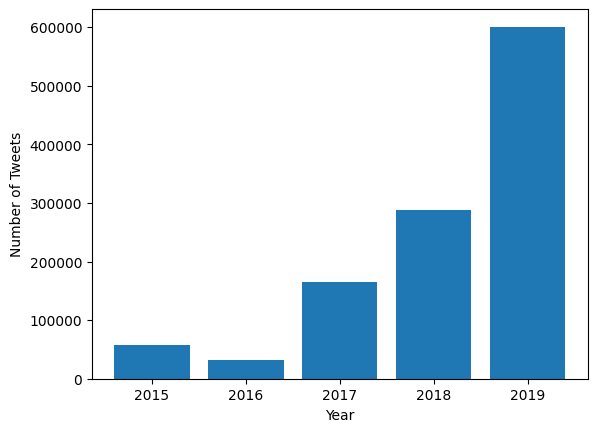

In [ ]:
plt.bar(yrs, twts)
plt.xlabel('Year')
plt.ylabel('Number of Tweets')
plt.show()

## Modularity over time (various sample sizes)

Q: How do modularity scores change over time? Is there an optimal sample size to capture accurate information while reducing computation time?

Preliminary Functions

In [ ]:
def sample_modplots(df, s, p=0):
  years = [2015, 2016, 2017, 2018, 2019]
  modscores = [];
  for yr in years:
    if p==0:
      dfyr = df[df['year'] == yr].sample(n=s)
    else:
      dfyr = df[df['year'] == yr].sample(frac=p)
    modscores.append(quick_mod(dfyr))
  return(modscores)

Plotting change in modularity over time, with various samples:

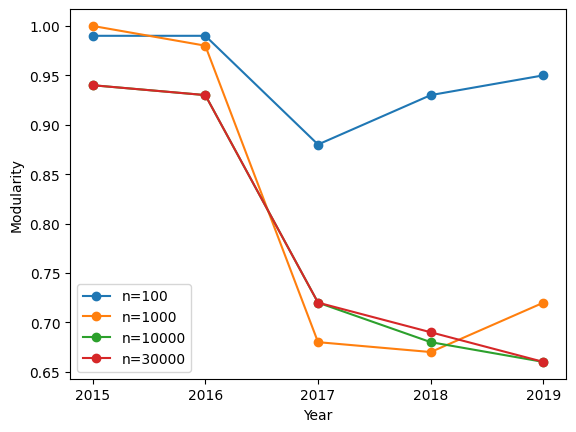

In [ ]:
years = [2015, 2016, 2017, 2018, 2019]

plt.plot(sample_modplots(mention_df, 100), marker='o', label='n=100')
plt.plot(sample_modplots(mention_df, 1000), marker='o', label='n=1000')
plt.plot(sample_modplots(mention_df, 10000), marker='o', label='n=10000')
plt.plot(sample_modplots(mention_df, 10000), marker='o', label='n=30000')
plt.xlabel('Year')
plt.ylabel('Modularity')
plt.xticks(range(len(years)), years)
plt.legend()
plt.show()

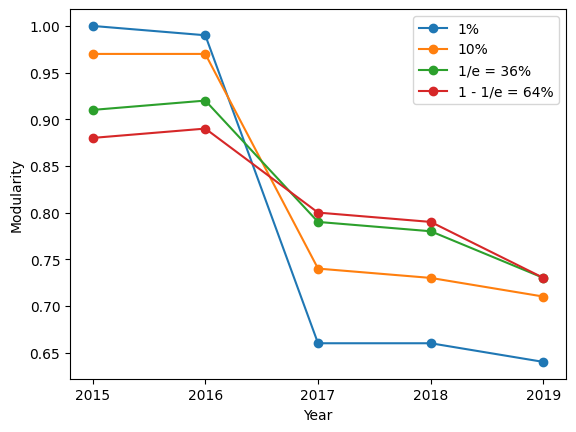

In [ ]:
plt.plot(sample_modplots(mention_df, s=0, p=0.01), marker='o', label='1%')
plt.plot(sample_modplots(mention_df, s=0, p=0.1), marker='o', label='10%')
plt.plot(sample_modplots(mention_df, s=0, p=1/math.e), marker='o', label='1/e = 36%')
plt.plot(sample_modplots(mention_df, s=0, p=1 - 1/math.e), marker='o', label='1 - 1/e = 64%')
plt.xlabel('Year')
plt.ylabel('Modularity')
plt.xticks(range(len(years)), years)
plt.legend()
plt.show()

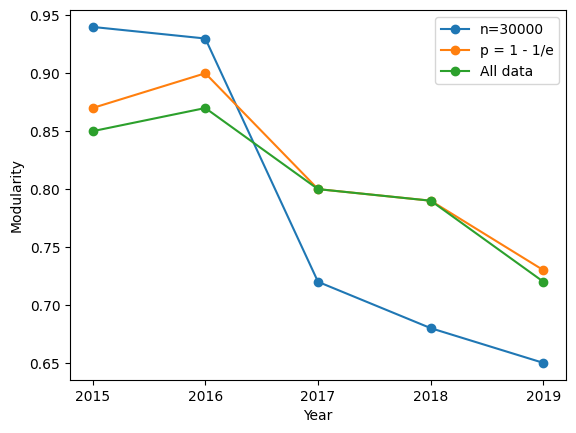

In [ ]:
years = range(2015, 2020)
truemods = [0.85, 0.87, 0.8, 0.79, 0.72]

# n
plt.plot(years, sample_modplots(mention_df, 10000), marker='o', label='n=30000')
# p
plt.plot(years, sample_modplots(mention_df, s=0, p=1 - 1/math.e), marker='o', label='p = 1 - 1/e')
# all
plt.plot(years, truemods, marker='o', label='All data')
plt.xlabel('Year')
plt.ylabel('Modularity')
plt.xticks(list(years))
plt.legend()
plt.show()

## Relative Size of Largest Community

QUESTION: What are the sizes of the (largest) communities, relative to the total number of nodes in the network?

Preliminary Functions

In [ ]:
def relsizes(df):
  # initialize graph
  G = nx.from_pandas_edgelist(df, 'username', "interact_with")
  # remove self loops
  G.remove_edges_from(list(nx.selfloop_edges(G)))
  # LOUVAIN
  node_cluster = algorithms.louvain(G)
  # extract communities
  com = node_cluster.communities
  # get community sizes
  com_sizes = []
  for i in range(len(com)):
    com_sizes.append(len(com[i]))
  com_sizes = sorted(com_sizes, reverse=True)
  rel_sizes = [c / len(G.nodes()) for c in com_sizes]
  return(rel_sizes)

def prop_coms_to_threshold(cs, th):
  sm = 0;
  i = 0;
  num_coms = 0;
  tot_coms = len(cs)
  while i < tot_coms and sm < th:
    sm += cs[i];
    i += 1;
    num_coms += 1;
  return(num_coms/tot_coms)

def relsizeplot(df):
  # run louvain, get list of community proportions
  rsl = relsizes(df);
  # initialize list to house proportion of communities to meet threshold
  prop_list = [];
  # initialize thresholds
  thlist = [0.5, 0.75, 0.9, 0.95];
  for th in thlist:
    prop = prop_coms_to_threshold(rsl, th)
    prop_list.append(prop)
  return(prop_list)

def thproplist(N):
  return(np.linspace(0, 1, N, endpoint=True))

def proplist(yr, N):
  # yr corresponds to df from specific year
  df = mention_df[mention_df['year'] == yr].sample(frac = 1 - 1/math.e)
  rsl = relsizes(df)

  # create list of threshold proportions
  thlist = thproplist(N)

  # map each threshold proportion into the function that calculates the
  # proportion of total nodes captured
  props = [];
  for th in thlist:
    props.append(prop_coms_to_threshold(rsl, th))
  return(props)

Q: For a given threshold proportion, how many nodes from Louvain communities would you need to meet said threshold?

The plots below attempt to answer that question:

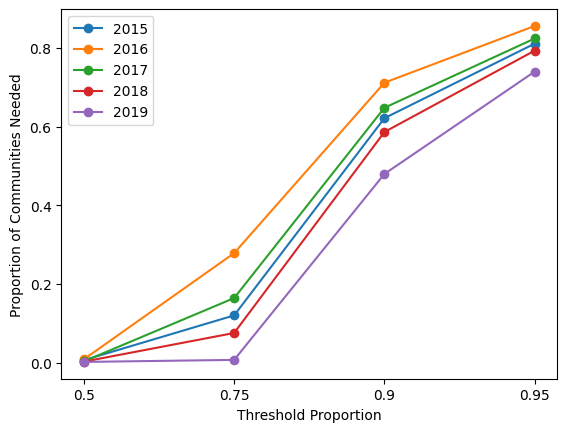

In [ ]:
thlist = [0.5, 0.75, 0.9, 0.95];
plt.plot(relsizeplot(df_year(mention_df, 2015).sample(frac=1 - 1/math.e)), marker='o', label='2015')
plt.plot(relsizeplot(df_year(mention_df, 2016).sample(frac=1 - 1/math.e)), marker='o', label='2016')
plt.plot(relsizeplot(df_year(mention_df, 2017).sample(frac=1 - 1/math.e)), marker='o', label='2017')
plt.plot(relsizeplot(df_year(mention_df, 2018).sample(frac=1 - 1/math.e)), marker='o', label='2018')
plt.plot(relsizeplot(df_year(mention_df, 2019).sample(frac=1 - 1/math.e)), marker='o', label='2019')
plt.xlabel('Threshold Proportion')
plt.ylabel('Proportion of Communities Needed')
plt.xticks(range(len(thlist)), thlist)
plt.legend()
plt.show()

For a specific year, numerically simulate the convergence of modularity scores from various threshold proportions.

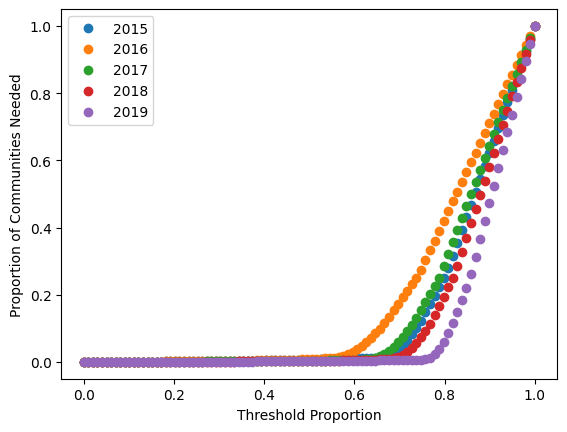

In [ ]:
N = 100;
x = thproplist(N)
y1 = proplist(2015, N)
y2 = proplist(2016, N)
y3 = proplist(2017, N)
y4 = proplist(2018, N)
y5 = proplist(2019, N)
plt.plot(x, y1, marker='o', linestyle='None', label='2015')
plt.plot(x, y2, marker='o', linestyle='None', label='2016')
plt.plot(x, y3, marker='o', linestyle='None', label='2017')
plt.plot(x, y4, marker='o', linestyle='None', label='2018')
plt.plot(x, y5, marker='o', linestyle='None', label='2019')
plt.xlabel('Threshold Proportion')
plt.ylabel('Proportion of Communities Needed')
plt.legend()
plt.show()

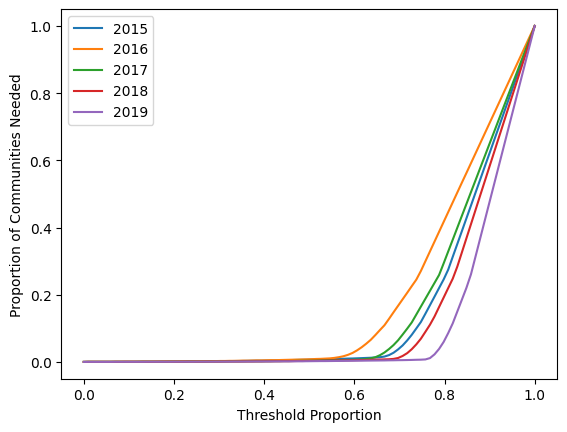

In [ ]:
plt.plot(x, y1, label='2015')
plt.plot(x, y2, label='2016')
plt.plot(x, y3, label='2017')
plt.plot(x, y4, label='2018')
plt.plot(x, y5, label='2019')
plt.xlabel('Threshold Proportion')
plt.ylabel('Proportion of Communities Needed')
plt.legend()
plt.show()

Log Plot of same data:

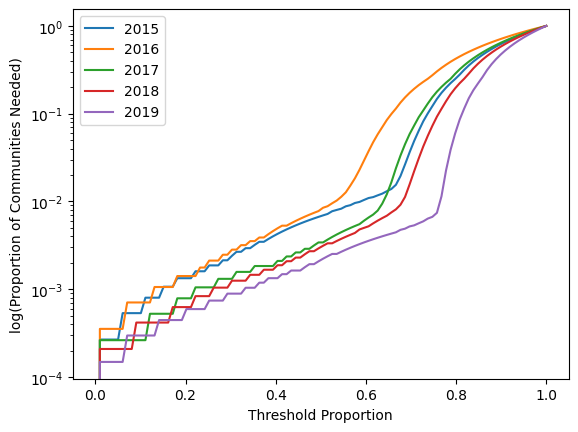

In [ ]:
plt.semilogy(x, y1, label='2015')
plt.semilogy(x, y2, label='2016')
plt.semilogy(x, y3, label='2017')
plt.semilogy(x, y4, label='2018')
plt.semilogy(x, y5, label='2019')
plt.xlabel('Threshold Proportion')
plt.ylabel('log(Proportion of Communities Needed)')
plt.legend()
plt.show()

## Sentiment Profile of Communities

+ color plots - largest, 10th
+ histograms - of communities (base hist) and sub (infl sub section)
+ violin plots - by largest community (ECN) and by multiple communities (Shebang)

QUESTION: Are sentiment similarities more present in communities?

Preliminary Functions

In [ ]:
def com_sent(df, n=0):
  coms = quick_louvain(df);
  # pick a community to focus on; by default, choose the largest.
  main_com = coms[n];
  com_df = df[df['username'].isin(main_com) & df['interact_with'].isin(main_com)]
  # now, calculate average sentiment across all tweets for each user:
  avg_sents = com_df.groupby(['username'])['sentiment'].mean().reset_index().sentiment.tolist()
  return(avg_sents)

def com_sent_plot(yr):
  df = mention_df[mention_df['year'] == yr].sample(frac = 1 - 1/math.e);
  all_data = [com_sent(df), com_sent(df, n=10), com_sent(df, n=50), com_sent(df, n=100)];
  # plot violin plot
  ax = plt.axes()

  plt.violinplot(all_data,
                  showmeans=True,
                  showmedians=False)
  plt.title('Violin plot distributions of sentiment, by community ' + '(' + str(yr) + ')')

  ax.yaxis.grid(True)
  ax.set_xticks([y + 1 for y in range(len(all_data))],
                  labels=['0', '10', '50', '100'])
  ax.set_xlabel('Community')
  ax.set_ylabel('Average User Sentiment')
  plt.show()

def com_n_sent_plot(n):
  # Goal: plot a SPECIFIC community's average sentiment ACROS ALL YEARS.
  years = range(2015, 2020);
  dfs = [];
  for yr in years:
    dfyr = mention_df[mention_df['year'] == yr].sample(frac = 1 - 1/math.e);
    dfs.append(dfyr);

  # for each year's df, run louvain; get nth community; and calculate average sentiment.
  data = [];
  for d in dfs:
    com_n_sent = com_sent(d, n);
    data.append(com_n_sent);

  # violin plot of all data
  ax = plt.axes()

  plt.violinplot(data,
                  showmeans=True,
                  showmedians=False)
  plt.title('Violin plot distributions of sentiment, 2015-2019: Community ' + str(n))

  ax.yaxis.grid(True)
  ax.set_xticks([y + 1 for y in range(len(data))],
                  labels=[str(y) for y in range(2015, 2020)])
  ax.set_xlabel('Year')
  ax.set_ylabel('Average User Sentiment')
  plt.show()

def sent_graph(yr, c):
  # make communities
  df = df_year(mention_df, yr)
  coms = quick_louvain(df)
  com_of_interest = coms[c]
  # draw graph
  com_df = df[df['username'].isin(com_of_interest)]

  G = nx.from_pandas_edgelist(com_df, 'username', "interact_with")
  G_users = list(G.nodes)
  print(len(G_users), "nodes")

  users = com_df.username.unique().tolist()
  print(com_df.username.nunique(), "users in df")

  # remove self-loops
  G.remove_edges_from(list(nx.selfloop_edges(G)))

  # remove non-tweeters
  non_tweeters = [x for x in G_users if x not in users]
  print(len(non_tweeters), "non-tweeters")
  G.remove_nodes_from(non_tweeters)
  pos = nx.spring_layout(G, seed = 0)

  fig, ax = plt.subplots(2, 2, figsize=(20,10))

  plt.subplot(1, 2, 1)
  # base graph
  nx.draw(G, pos = pos, node_size = 50)

  plt.subplot(1, 2, 2)
  # color by avg sentiment
  sents = com_df.groupby(['username'])['sentiment'].mean().reset_index().sentiment.tolist()
  nodes = nx.draw_networkx_nodes(G, pos = pos, node_size = 50, node_color = sents, cmap = 'RdBu')
  nx.draw_networkx_edges(G, pos = pos)
  plt.colorbar(nodes)
  plt.axis('off')

def sent_graph2(df, c):
  # make communities
  coms = quick_louvain(df)
  com_of_interest = coms[c]
  # draw graph
  com_df = df[df['username'].isin(com_of_interest)]

  G = nx.from_pandas_edgelist(com_df, 'username', "interact_with")
  G_users = list(G.nodes)
  print(len(G_users), "nodes")

  users = com_df.username.unique().tolist()
  print(com_df.username.nunique(), "users in df")

  # remove self-loops
  G.remove_edges_from(list(nx.selfloop_edges(G)))

  # remove non-tweeters
  non_tweeters = [x for x in G_users if x not in users]
  print(len(non_tweeters), "non-tweeters")
  G.remove_nodes_from(non_tweeters)
  pos = nx.spring_layout(G, seed = 0)

  fig, ax = plt.subplots(2, 2, figsize=(20,10))

  plt.subplot(1, 2, 1)
  # base graph
  nx.draw(G, pos = pos, node_size = 50)

  plt.subplot(1, 2, 2)
  # color by avg sentiment
  sents = com_df.groupby(['username'])['sentiment'].mean().reset_index().sentiment.tolist()
  nodes = nx.draw_networkx_nodes(G, pos = pos, node_size = 50, node_color = sents, cmap = 'RdBu')
  nx.draw_networkx_edges(G, pos = pos)
  plt.colorbar(nodes)
  plt.axis('off')

def sent_graph_hist(yr, c):
  # make communities/community df
  df = df_year(mention_df, yr)
  coms = quick_louvain(df)
  com_of_interest = coms[c]
  com_df = df[df['username'].isin(com_of_interest)]

  # plot histogram of individual/avg user sentiment
  fig, ax = plt.subplots(2, 2, figsize=(10,3))

  scores = com_df.sentiment.tolist()
  plt.subplot(1, 2, 1)
  plt.hist(scores, bins=20)
  plt.title('Distribution of All Sentiment Scores')

  avg_scores = com_df.groupby(['username'])['sentiment'].mean().reset_index().sentiment.tolist()
  plt.subplot(1, 2, 2)
  plt.hist(avg_scores, bins = 20)
  plt.title('Distribution of Average User Sentiment')

def sent_graph_hist2(df, c):
  # make communities/community df
  coms = quick_louvain(df)
  com_of_interest = coms[c]
  com_df = df[df['username'].isin(com_of_interest)]

  # plot histogram of individual/avg user sentiment
  fig, ax = plt.subplots(2, 2, figsize=(10,3))

  scores = com_df.sentiment.tolist()
  plt.subplot(1, 2, 1)
  plt.hist(scores, bins=20)
  plt.title('Distribution of All Sentiment Scores')

  avg_scores = com_df.groupby(['username'])['sentiment'].mean().reset_index().sentiment.tolist()
  plt.subplot(1, 2, 2)
  plt.hist(avg_scores, bins = 20)
  plt.title('Distribution of Average User Sentiment')

def sub_louvain(year, n=0):
  df = df_year(mention_df, year)

  # first, run louvain and extract the base community.
  coms = quick_louvain(df)
  main_com = coms[n]

  # next, subset df by users in main com
  comdf = df[df['username'].isin(main_com)]
  comdf = df[df['interact_with'].isin(main_com)]

  # re-run louvain to get subcommunities
  subcoms = quick_louvain(comdf)

  # calculate modularity
  submod = quick_mod(comdf)

  res = [comdf, subcoms, submod]
  return(res)

### Plotting Distribution of Sentiment by Community

1. Largest Community

2015:

In [ ]:
# import networkx as nx
import cdlib.algorithms as algo
import cdlib.viz as viz
import matplotlib.pyplot as plt

mention_2015 = df_year(mention_df, 2015)

G = nx.from_pandas_edgelist(mention_2015, 'username', "interact_with")
# remove self loops
G.remove_edges_from(list(nx.selfloop_edges(G)))

# print(str(len(G.nodes())), 'nodes (original)')

# Adjacency Matrix
# A = nx.to_numpy_array(G).astype(int)

# confirm that there are no self-loops: sum of diag = 0
# print('Sum of Adjacency Matrix Main Diagonal:', str(sum(np.diagonal(A))))

# confirm that there are no isolated nodes: sum of each row > 0
# rowsum = A.sum(axis=1).tolist()
# bad = [n for n in rowsum if n == 0]
# print(str(len(bad)), 'rows (vertices) must be removed')

# isol = [n for n,d in G.degree() if G.degree(n) == 0]
# G.remove_nodes_from(isol)

# print(str(len(G.nodes())), 'nodes (no isolated)')

# LOUVAIN
node_cluster = algorithms.louvain(G)

# We extract the communities that produced maximal modularity
com = node_cluster.communities
print(str(len(com)) + ' communities')

# We can also extract the modularity of this
mod = node_cluster.newman_girvan_modularity()
print('Modularity = ' + str(round(mod.score,2)))

com_sizes = []

for i in range(len(com)):
  com_sizes.append(len(com[i]))

com_sizes = sorted(com_sizes, reverse=True)
top_sizes = com_sizes[:10]
print('Top Community Sizes:', top_sizes)

top_coms = [x for x in com if len(x) in top_sizes]

com_of_interest = top_coms[0]
com_df = mention_2015[mention_2015['username'].isin(com_of_interest) & mention_2015['interact_with'].isin(com_of_interest)]
avg_sents_2015 = np.array(com_df.groupby(['username'])['sentiment'].mean().reset_index().sentiment.tolist())

4118 communities
Modularity = 0.85
Top Community Sizes: [2409, 1691, 1632, 1603, 1586, 1402, 1288, 925, 777, 638]


2016:

In [ ]:
import networkx as nx
import cdlib.algorithms as algo
import cdlib.viz as viz
import matplotlib.pyplot as plt

mention_2016 = df_year(mention_df, 2016)

G = nx.from_pandas_edgelist(mention_2016, 'username', "interact_with")
# remove self loops
G.remove_edges_from(list(nx.selfloop_edges(G)))

node_cluster = louvain(G)
# We extract the communities that produced maximal modularity
com = node_cluster.communities
print(str(len(com)) + ' communities')
# We can also extract the modularity of this
mod = node_cluster.newman_girvan_modularity()
print('Modularity = ' + str(round(mod.score,2)))

com_sizes = []

for i in range(len(com)):
  com_sizes.append(len(com[i]))

com_sizes = sorted(com_sizes, reverse=True)
top_sizes = com_sizes[:10]
print('Top Community Sizes:', top_sizes)

top_coms = [x for x in com if len(x) in top_sizes]

com_of_interest = top_coms[0]
com_df = mention_2016[mention_2016['username'].isin(com_of_interest) & mention_2016['interact_with'].isin(com_of_interest)]
avg_sents_2016 = np.array(com_df.groupby(['username'])['sentiment'].mean().reset_index().sentiment.tolist())

3206 communities
Modularity = 0.87
Top Community Sizes: [1606, 1548, 1348, 771, 594, 583, 564, 492, 482, 480]


2017:

In [ ]:
import networkx as nx
import cdlib.algorithms as algo
import cdlib.viz as viz
import matplotlib.pyplot as plt

mention_2017 = df_year(mention_df, 2017)

G = nx.from_pandas_edgelist(mention_2017, 'username', "interact_with")
# remove self loops
G.remove_edges_from(list(nx.selfloop_edges(G)))

node_cluster = louvain(G)
# We extract the communities that produced maximal modularity
com = node_cluster.communities
print(str(len(com)) + ' communities')
# We can also extract the modularity of this
mod = node_cluster.newman_girvan_modularity()
print('Modularity = ' + str(round(mod.score,2)))

com_sizes = []

for i in range(len(com)):
  com_sizes.append(len(com[i]))

com_sizes = sorted(com_sizes, reverse=True)
top_sizes = com_sizes[:10]
print('Top Community Sizes:', top_sizes)

top_coms = [x for x in com if len(x) in top_sizes]

com_of_interest = top_coms[0]
com_df = mention_2017[mention_2017['username'].isin(com_of_interest) & mention_2017['interact_with'].isin(com_of_interest)]
avg_sents_2017 = np.array(com_df.groupby(['username'])['sentiment'].mean().reset_index().sentiment.tolist())

4182 communities
Modularity = 0.8
Top Community Sizes: [4294, 2030, 1716, 1612, 1576, 1552, 1244, 1050, 767, 740]


2018:

In [ ]:
import networkx as nx
import cdlib.algorithms as algo
import cdlib.viz as viz
import matplotlib.pyplot as plt

mention_2018 = df_year(mention_df, 2018)

G = nx.from_pandas_edgelist(mention_2018, 'username', "interact_with")
# remove self loops
G.remove_edges_from(list(nx.selfloop_edges(G)))

node_cluster = louvain(G)
# We extract the communities that produced maximal modularity
com = node_cluster.communities
print(str(len(com)) + ' communities')
# We can also extract the modularity of this
mod = node_cluster.newman_girvan_modularity()
print('Modularity = ' + str(round(mod.score,2)))

com_sizes = []

for i in range(len(com)):
  com_sizes.append(len(com[i]))

com_sizes = sorted(com_sizes, reverse=True)
top_sizes = com_sizes[:10]
print('Top Community Sizes:', top_sizes)

top_coms = [x for x in com if len(x) in top_sizes]

com_of_interest = top_coms[0]
com_df = mention_2018[mention_2018['username'].isin(com_of_interest) & mention_2018['interact_with'].isin(com_of_interest)]
avg_sents_2018 = np.array(com_df.groupby(['username'])['sentiment'].mean().reset_index().sentiment.tolist())

5009 communities
Modularity = 0.79
Top Community Sizes: [4765, 4319, 2969, 2496, 2454, 2016, 1790, 1278, 1097, 1088]


2019:

In [ ]:
import networkx as nx
import cdlib.algorithms as algo
import cdlib.viz as viz
import matplotlib.pyplot as plt

mention_2019 = df_year(mention_df, 2019)

G = nx.from_pandas_edgelist(mention_2019, 'username', "interact_with")
# remove self loops
G.remove_edges_from(list(nx.selfloop_edges(G)))

node_cluster = louvain(G)
# We extract the communities that produced maximal modularity
com = node_cluster.communities
print(str(len(com)) + ' communities')
# We can also extract the modularity of this
mod = node_cluster.newman_girvan_modularity()
print('Modularity = ' + str(round(mod.score,2)))

com_sizes = []

for i in range(len(com)):
  com_sizes.append(len(com[i]))

com_sizes = sorted(com_sizes, reverse=True)
top_sizes = com_sizes[:10]
print('Top Community Sizes:', top_sizes)

top_coms = [x for x in com if len(x) in top_sizes]

com_of_interest = top_coms[0]
com_df = mention_2019[mention_2019['username'].isin(com_of_interest) & mention_2019['interact_with'].isin(com_of_interest)]
avg_sents_2019 = np.array(com_df.groupby(['username'])['sentiment'].mean().reset_index().sentiment.tolist())

6752 communities
Modularity = 0.72
Top Community Sizes: [8481, 6153, 5677, 5431, 4633, 3390, 3088, 2617, 2301, 2208]


Violin Plot of data from these years:

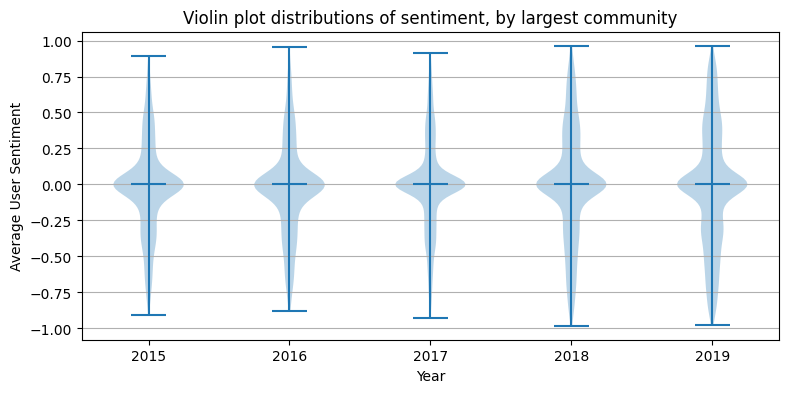

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 4))

# Fixing random state for reproducibility
np.random.seed(19680801)

# generate some random test data
all_data = [avg_sents_2015, avg_sents_2016, avg_sents_2017, avg_sents_2018, avg_sents_2019]

# plot violin plot
plt.violinplot(all_data,
                  showmeans=False,
                  showmedians=True)
plt.title('Violin plot distributions of sentiment, by largest community')

ax.yaxis.grid(True)
ax.set_xticks([y + 1 for y in range(len(all_data))],
                  labels=['2015', '2016', '2017', '2018', '2019'])
ax.set_xlabel('Year')
ax.set_ylabel('Average User Sentiment')
plt.show()

2. Multiple Communities

Single Year, Multiple Community Sizes:

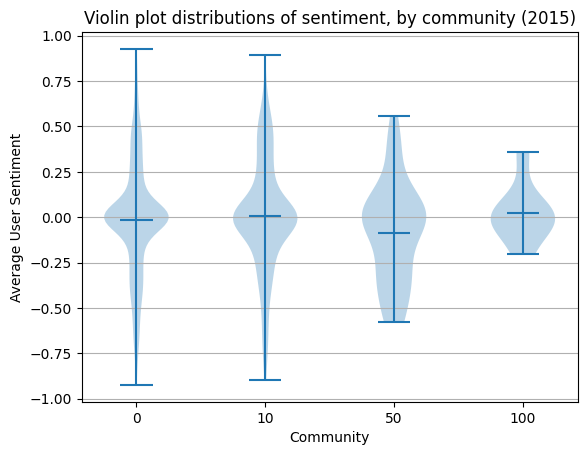

In [ ]:
com_sent_plot(2015)

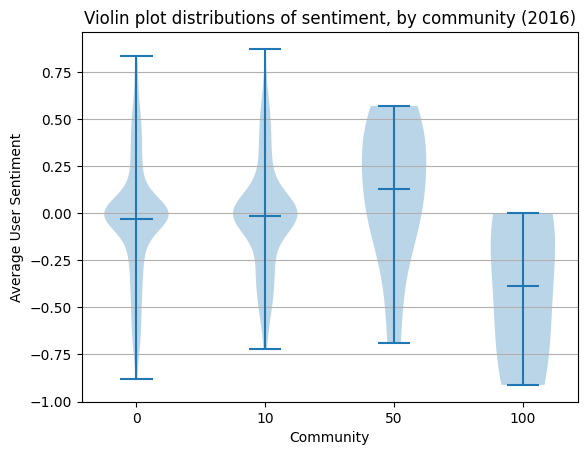

In [ ]:
com_sent_plot(2016)

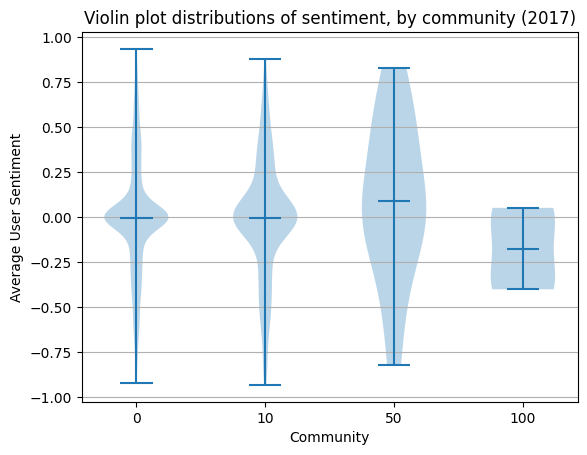

In [ ]:
com_sent_plot(2017)

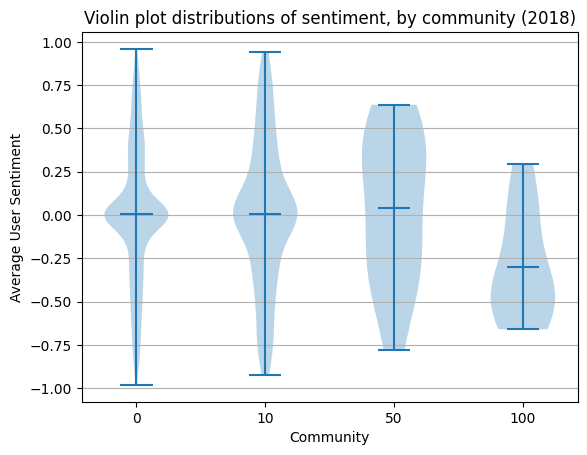

In [ ]:
com_sent_plot(2018)

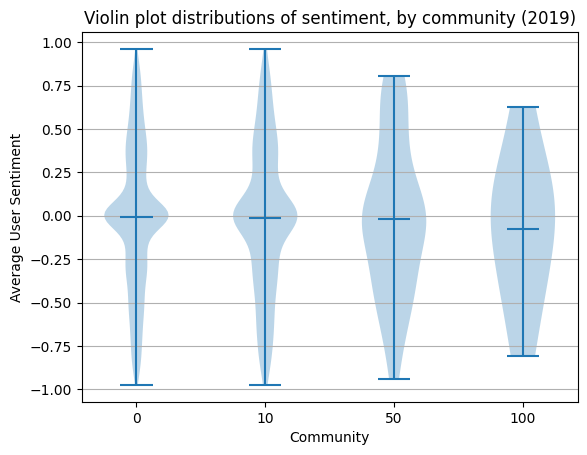

In [ ]:
com_sent_plot(2019)

Single community size, across all years:

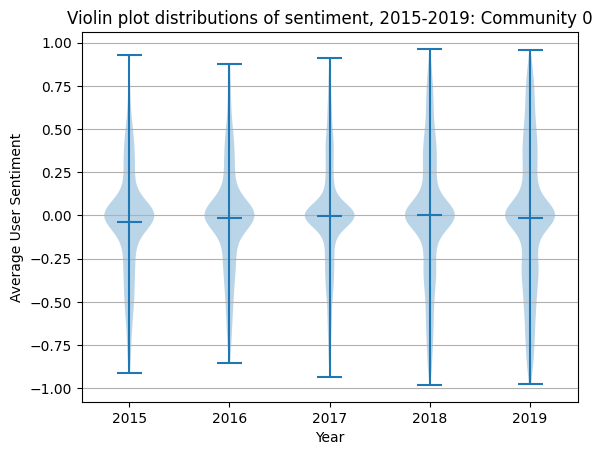

In [ ]:
com_n_sent_plot(0)

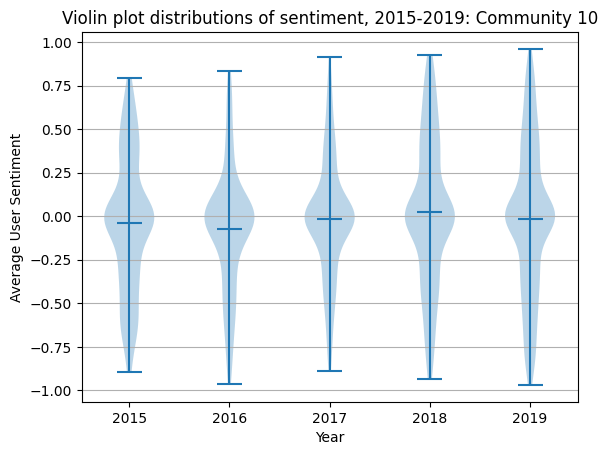

In [ ]:
com_n_sent_plot(10)

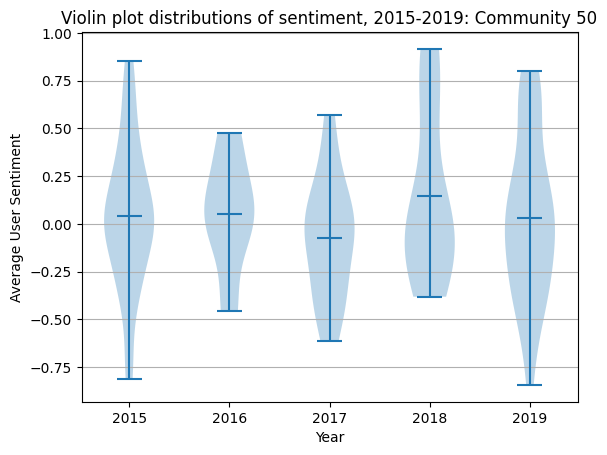

In [ ]:
com_n_sent_plot(50)

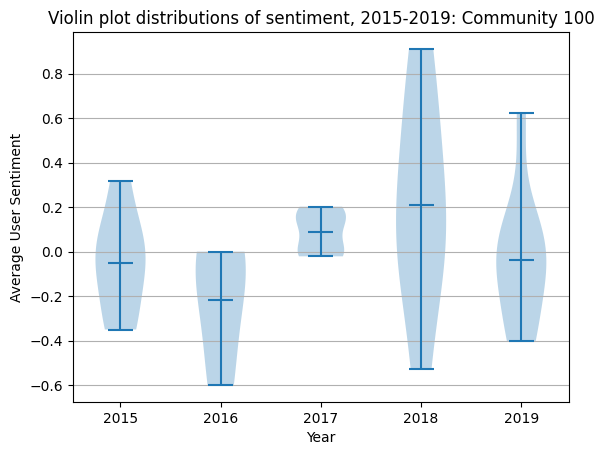

In [ ]:
com_n_sent_plot(100)

### Drawing Communities, Overlaying with Sentiment

401 nodes
253 users in df
148 non-tweeters


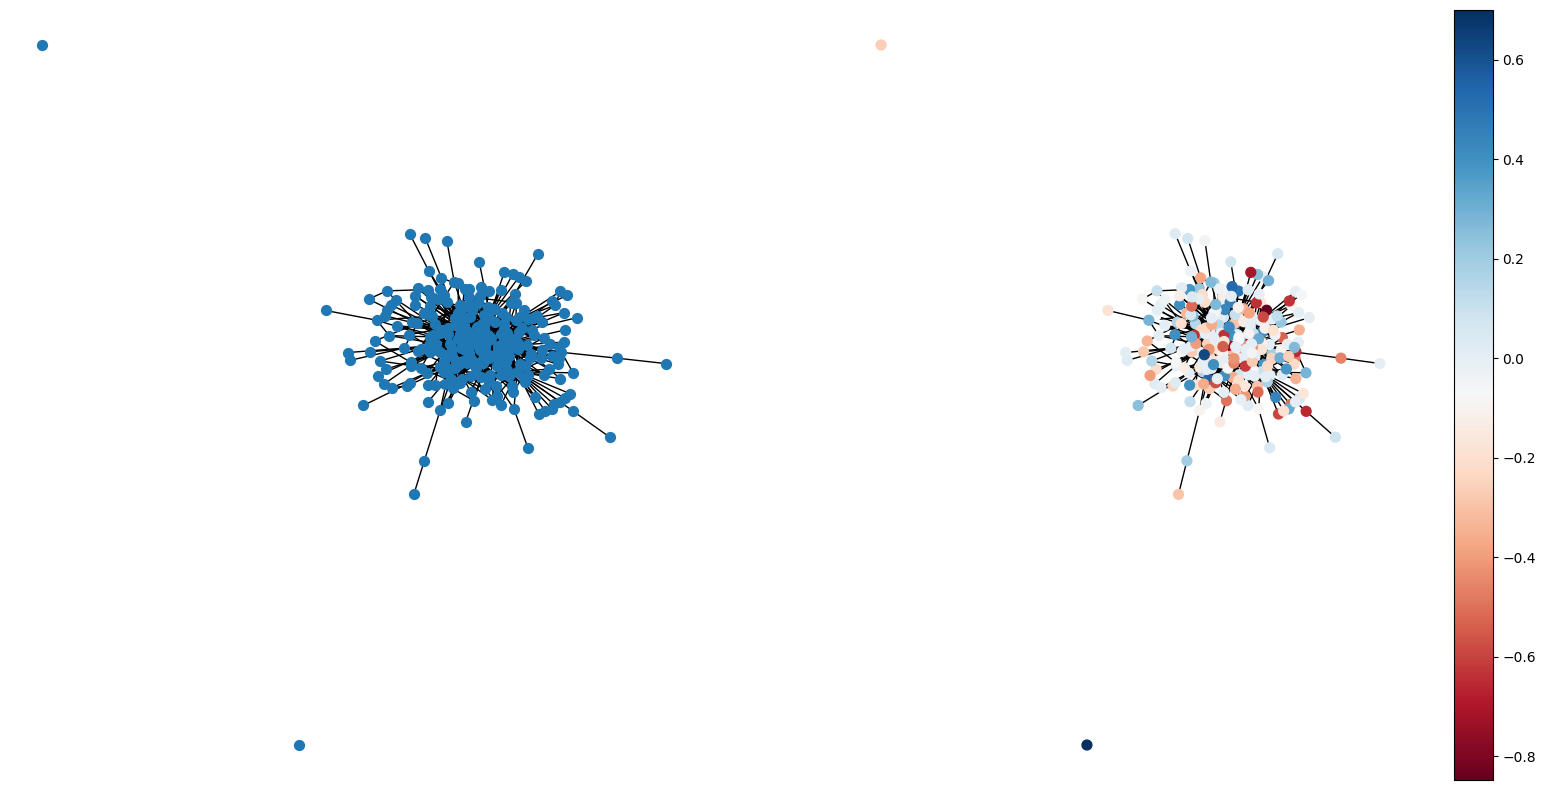

In [ ]:
sent_graph2(mention_2016_clean, 0)

55 nodes
43 users in df
12 non-tweeters


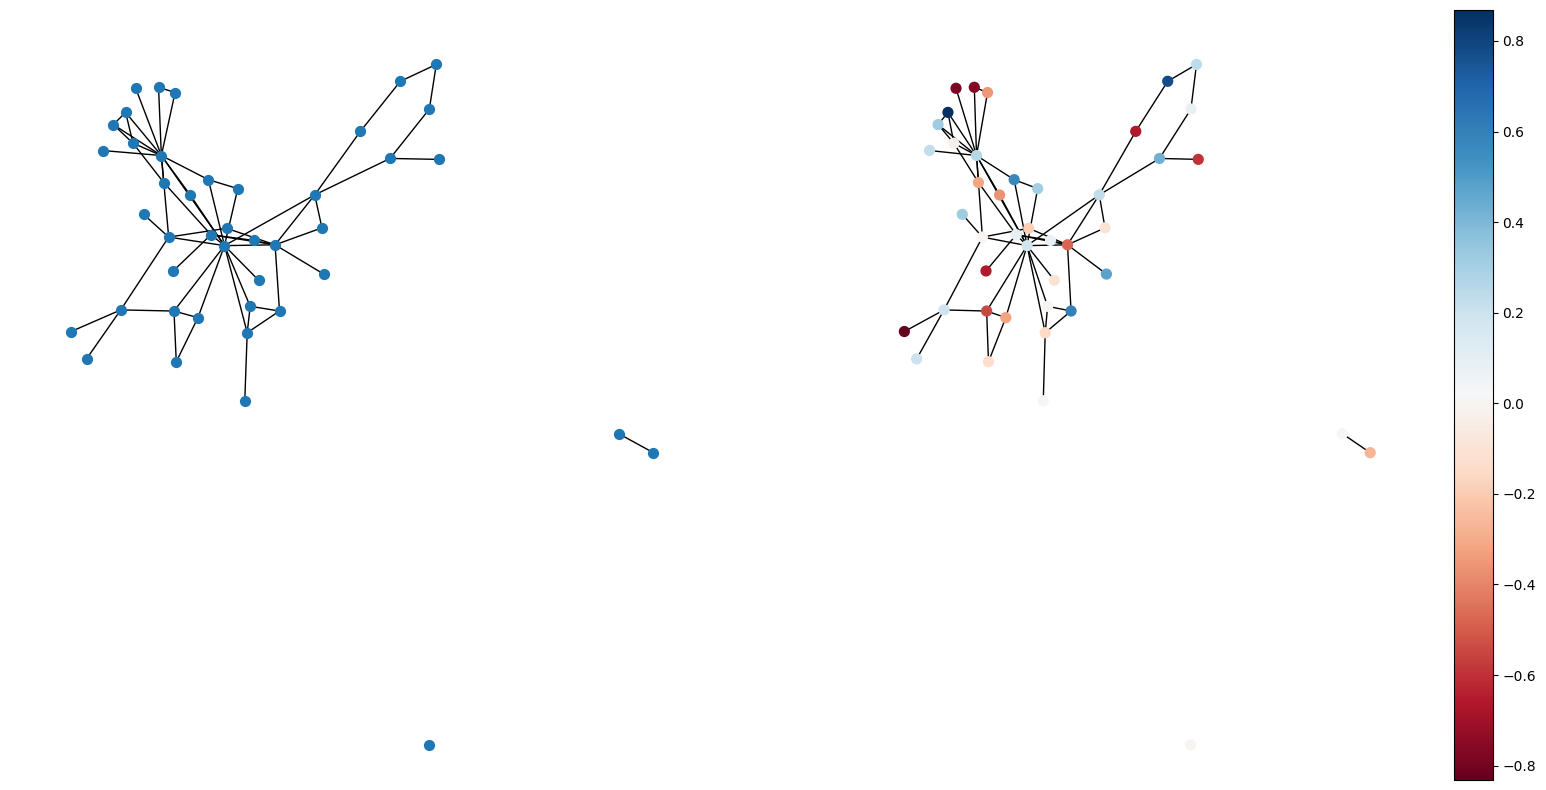

In [ ]:
sent_graph2(mention_2016_clean, 9)

In [ ]:
sent_graph_hist(mention_2016_clean, 9)

3 nodes
3 users in df
0 non-tweeters


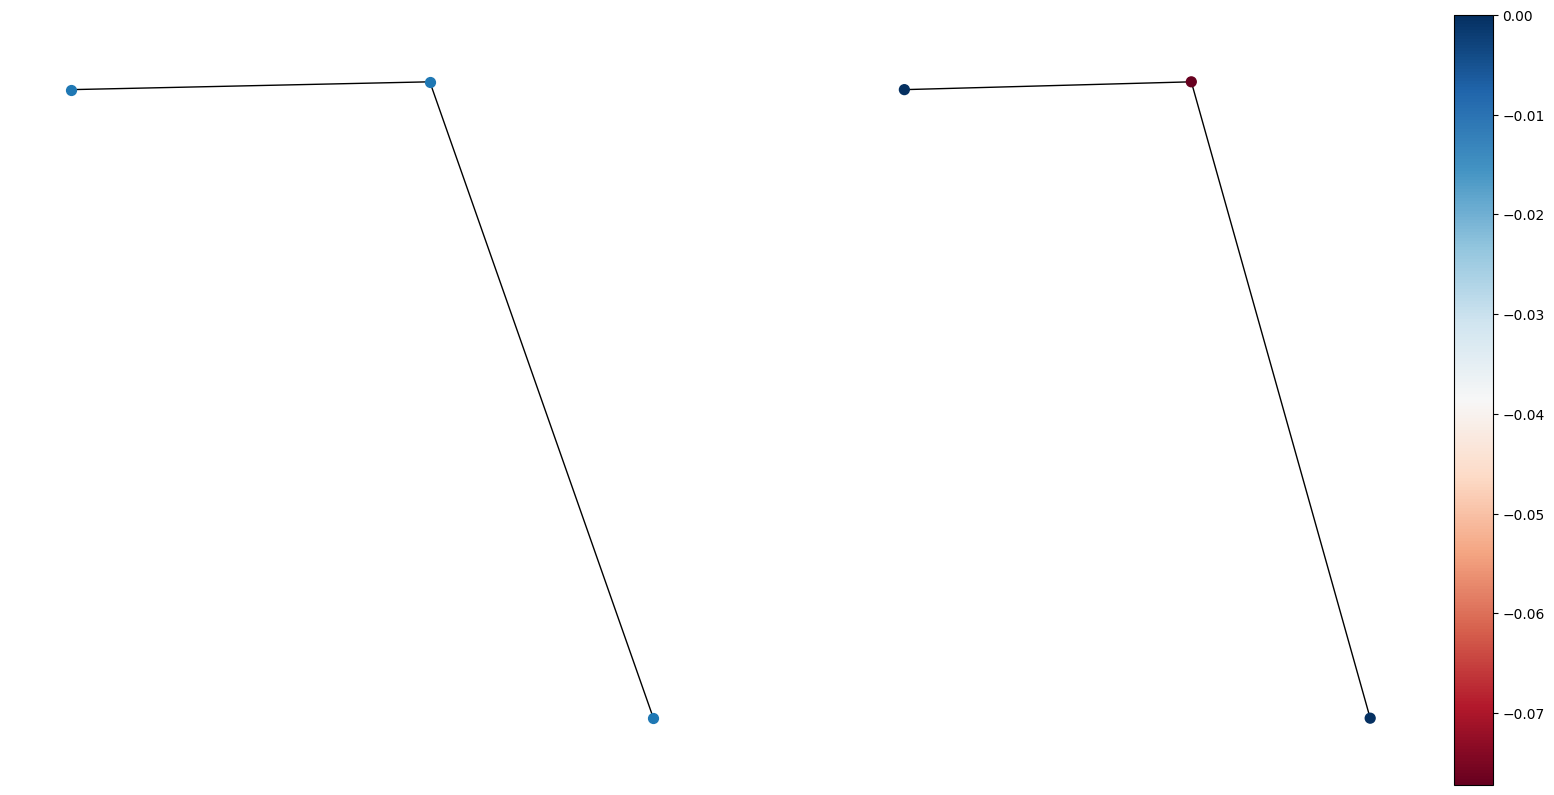

In [ ]:
sent_graph2(mention_2016_clean, 49)

2 nodes
2 users in df
0 non-tweeters


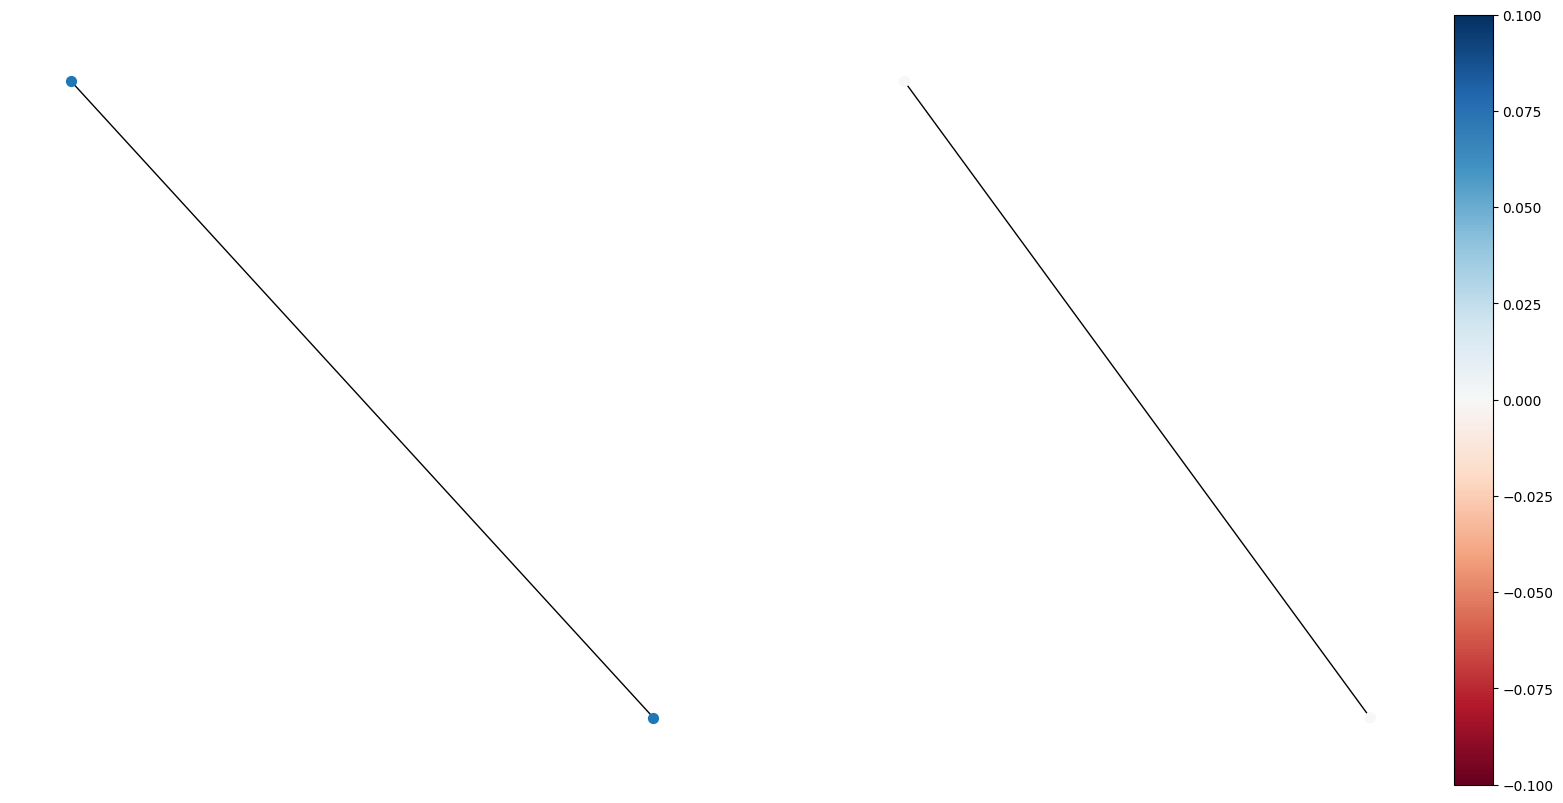

In [ ]:
sent_graph2(mention_2016_clean, 99)

### Sub-communities

In [ ]:
subinfo = sub_louvain(2015, 0)
subdf = subinfo[0]
subcoms = subinfo[1]
submod = subinfo[2]

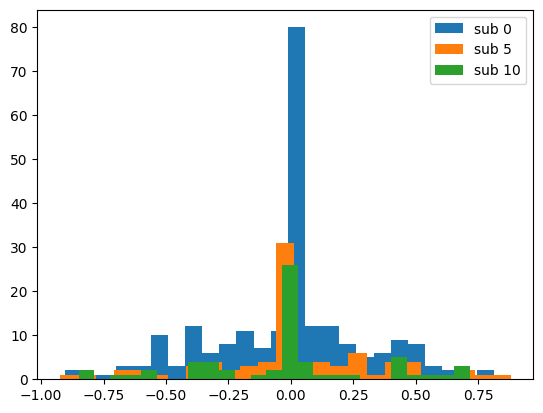

In [ ]:
data0 = com_sent(subdf)
data1 = com_sent(subdf, 5)
data2 = com_sent(subdf, 10)
# data3 = com_sent(subdf, 15)
# data4 = com_sent(subdf, 20)

plt.hist(data0, bins = 25, label='sub 0')
plt.hist(data1, bins = 25, label='sub 5')
plt.hist(data2, bins = 25, label='sub 10')
# plt.hist(data3, bins = 25, label='sub 15')
# plt.hist(data4, bins = 25, label='sub 20')

plt.legend()
plt.show()

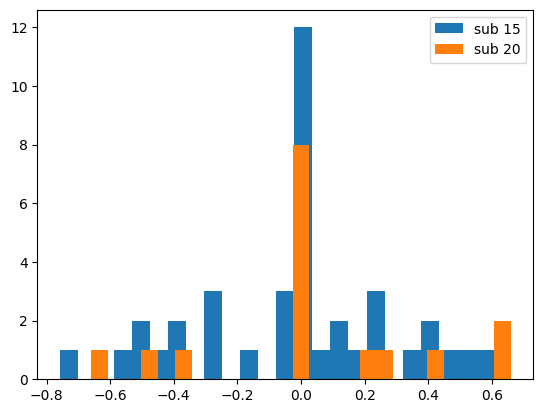

In [ ]:
# data0 = com_sent(subdf)
# data1 = com_sent(subdf, 5)
# data2 = com_sent(subdf, 10)
data3 = com_sent(subdf, 15)
data4 = com_sent(subdf, 20)

# plt.hist(data0, bins = 25, label='sub 0')
# plt.hist(data1, bins = 25, label='sub 5')
# plt.hist(data2, bins = 25, label='sub 10')
plt.hist(data3, bins = 25, label='sub 15')
plt.hist(data4, bins = 25, label='sub 20')

plt.legend()
plt.show()

# Influencers

Preliminary Functions

In [ ]:
from networkx.algorithms.centrality.degree_alg import degree_centrality

def get_influencers(df, c=0):
  # first, construct graph from whole df and run Louvain (done in previous function)
  # Pick a community to look at: by default. the largest one
  all_coms = quick_louvain(df)
  com = all_coms[c]

  # construct a new graph to look at from the subset of users from the largest community
  comdf = df[df['username'].isin(com)]
  comdf = df[df['interact_with'].isin(com)]
  comG = nx.from_pandas_edgelist(comdf, 'username', 'interact_with')

  # find influencers from this graph
  degcent = degree_centrality(comG)
  vals = [*degcent.values()]
  vals.sort(reverse=True)
  infl_pairs = [(n, round(d, 3), len(comG.nodes()), 0, len(all_coms)) for n, d in degcent.items() if d == vals[0]]
  # influencers = [*dict(infl_pairs).keys()]

  # return an ordered pair of most connected user and corresponding proportion of total degree
  return(infl_pairs)

def get_inf_from_com_year(cl, yr):
  # Goal: easier way to find influencers, given that we've already run Louvain
  df = df_year(mention_df, yr)
  # since input is a list of names, subset df by these users
  comdf = df[df['username'].isin(cl)]
  comdf = df[df['interact_with'].isin(cl)]
  # construct graph and find influencers
  comG = nx.from_pandas_edgelist(comdf, 'username', 'interact_with')
  degcent = degree_centrality(comG)
  vals = [*degcent.values()]
  vals.sort(reverse=True)
  infl_pairs = [(n, round(d, 3)) for n, d in degcent.items() if d == vals[0]]
  return(infl_pairs)

def find(element, matrix):
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            if matrix[i][j] == element:
                return (i, j)

def track_influencers(start, end, c=0):
  # establish starting df, where the influencer is first seen
  df = df_year(mention_df, start)
  infl = get_influencers(df, c)[0]
  infl_over_years = [];
  infl_over_years.append(infl)

  # want to iterate over all years in between input parameters
  if start < end:
    # 2015 -> 2019
    years = range(start + 1, end + 1)
  else:
    # 2019 -> 2015
    years = range(start, end - 1, -1)

  # for each year, find where the influencer lands
  for yr in years:
    # run Louvain on other years, get communities
    df_yr = df_year(mention_df, yr)
    coms = quick_louvain(df_yr)

    # find which community the influencer lies in
    location = find(infl[0], coms) # output: (row, column)
    row = location[0]
    com_with_infl = coms[row]

    # find centrality of 2015 influencer in new community
    com_with_infl_df = df_yr[df_yr['username'].isin(com_with_infl)]
    com_with_infl_df = df_yr[df_yr['interact_with'].isin(com_with_infl)]
    comG = nx.from_pandas_edgelist(com_with_infl_df, 'username', 'interact_with')
    degcent = degree_centrality(comG)
    vals = [*degcent.values()]
    # vals.sort(reverse=True)

    # Final Product: ordered quintuple
    # (influencer, centrality in current year, com size, com number, total communities)
    infl_pairs = [(n, round(d, 3), len(comG.nodes()), row, len(coms)) for n, d in degcent.items() if n == infl[0]]
    infl_over_years.append(infl_pairs[0])

  return(infl_over_years)

def compare_infl_sents(l):
  # start with list, output of track/get_influencers
  infl_list = [x[0] for x in l]
  n_list = [x[3] for x in l]

  # get years to iterate through
  years = range(2015, 2015 + len(l))
  reslist = [];

  # for each year, calculate avg com sent
  for i in range(len(years)):
    yr = years[i]
    infl = infl_list[i]
    n = n_list[i]
    df_yr = df_year(mention_df, yr)

    # calculate avg sent for the influencer in that community
    coms = quick_louvain(df_yr)
    main_com = coms[n]
    com_df = df_yr[df_yr['username'].isin(main_com) & df_yr['interact_with'].isin(main_com)]
    avg_sents = com_df.groupby(['username'])['sentiment'].mean().reset_index()
    infl_sent = avg_sents[avg_sents['username'] == infl].sentiment.to_list()
    # infl_sent = infl_sent[0]

    # calculate avg community sentiment over all avg user sentiments
    c_sent_list = com_sent(df_yr, n)
    c_sent = round(np.mean(c_sent_list), 3)

    # final product: (infl, infl sent, com sent)
    res = (infl, infl_sent, c_sent)
    reslist.append(res)

  return(reslist)

def get_centralities(year, n=0):
  df = df_year(mention_df, year)
  coms = quick_louvain(df)
  main_com = coms[n]
  comdf = df[df['username'].isin(main_com)]
  comdf = df[df['interact_with'].isin(main_com)]
  comG = nx.from_pandas_edgelist(comdf, 'username', 'interact_with')
  degcent = degree_centrality(comG)
  vals = [*degcent.values()]
  vals.sort(reverse=True)
  res = [round(v, 3) for v in vals]
  return(res)

def draw_com(year, n):
  df = df_year(mention_df, year)
  coms = quick_louvain(df)
  main_com = coms[n]
  com_df = df[df['username'].isin(main_com)]
  com_df = df[df['interact_with'].isin(main_com)]
  com_G = nx.from_pandas_edgelist(com_df, 'username', 'interact_with')
  return(com_G)

def com_deg_info(year, com_index):
  # inputs: year = year, n = community index
  G = draw_com(year, com_index)

  degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
  dmax = max(degree_sequence)

  fig = plt.figure("Degree of a community graph", figsize=(8, 8))
  # Create a gridspec for adding subplots of different sizes
  axgrid = fig.add_gridspec(5, 4)

  ax0 = fig.add_subplot(axgrid[0:3, :])
  Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
  pos = nx.spring_layout(Gcc, seed=10396953)
  nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
  nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
  ax0.set_title("Connected components of G")
  ax0.set_axis_off()

  ax1 = fig.add_subplot(axgrid[3:, :2])
  ax1.plot(degree_sequence, "b-", marker="o")
  ax1.set_title("Degree Rank Plot")
  ax1.set_ylabel("Degree")
  ax1.set_xlabel("Rank")

  ax2 = fig.add_subplot(axgrid[3:, 2:])
  ax2.bar(*np.unique(degree_sequence, return_counts=True))
  ax2.set_title("Degree histogram")
  ax2.set_xlabel("Degree")
  ax2.set_ylabel("# of Nodes")

  fig.tight_layout()
  plt.show()

  avg_path_len = round(nx.average_shortest_path_length(Gcc), 3)
  print('Average Shortest Path Length: ', avg_path_len)

# doesn't draw the graph; for larger communities
def com_deg_info2(year, com_index):
  G = draw_com(year, com_index)

  degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
  dmax = max(degree_sequence)

  fig = plt.figure("Degree of a community graph", figsize=(8, 8))
  # Create a gridspec for adding subplots of different sizes
  axgrid = fig.add_gridspec(5, 4)

  ax1 = fig.add_subplot(axgrid[3:, :2])
  ax1.plot(degree_sequence, "b-", marker="o")
  ax1.set_title("Degree Rank Plot")
  ax1.set_ylabel("Degree")
  ax1.set_xlabel("Rank")

  ax2 = fig.add_subplot(axgrid[3:, 2:])
  ax2.bar(*np.unique(degree_sequence, return_counts=True))
  ax2.set_title("Degree histogram")
  ax2.set_xlabel("Degree")
  ax2.set_ylabel("# of Nodes")

  fig.tight_layout()
  plt.show()

def get_com_df(year, n=0):
  df = df_year(mention_df, year)
  coms = quick_louvain(df)
  main_com = coms[n]
  comdf = df[df['username'].isin(main_com)]
  comdf = df[df['interact_with'].isin(main_com)]
  return comdf

def get_com_influencer(df):
  # df = get_com_df(year, n)
  comG = nx.from_pandas_edgelist(df, 'username', 'interact_with')

  # find influencer by largest degree centrality
  degcent = degree_centrality(comG)
  vals = [*degcent.values()]
  vals.sort(reverse=True)
  # infl_pairs = [(n, round(d, 3), len(comG.nodes()), 0, len(all_coms)) for n, d in degcent.items() if d == vals[0]]
  infl_list = [n for n, d in degcent.items() if d == vals[0]]
  return(infl_list)

def infl_spread(yr, c=0):
  cdf = get_com_df(yr, c)
  infl = get_com_influencer(cdf)

  deg1df = cdf.loc[(cdf['username'].isin(infl))]
  deg1 = deg1df.interact_with.to_list()

  deg2df = deg1df.loc[(deg1df['username'].isin(deg1))]
  deg2 = deg2df.interact_with.tolist()

  node = infl[0] # The center node
  radius = 2 # Degrees of separation
  G = nx.from_pandas_edgelist(cdf, 'username', 'interact_with')
  new_graph = nx.generators.ego_graph(G, node, radius=radius)

  # calculate shortest paths from influencer
  paths = nx.shortest_path(new_graph, source=infl[0])

  # deg-1: directly connected to infl
  d1paths = [paths[n] for n in list(new_graph.nodes()) if len(paths[n]) == 2]
  d1users = [p[1] for p in d1paths]

  # deg-2: path of length 2, requires 3 nodes if include influencer.
  d2paths = [paths[n] for n in list(new_graph.nodes()) if len(paths[n]) == 3]
  d2users = [p[2] for p in d2paths]

  # deg-2: path of length 3, requires 4 nodes if include influencer.
  # d3paths = [paths[n] for n in list(new_graph.nodes()) if len(paths[n]) == 4]
  # d3users = [p[3] for p in d3paths]

  # get sentiments from deg-1 and deg-2 users
  d1sents = cdf[cdf['username'].isin(d1users)].sentiment.tolist()
  d2sents = cdf[cdf['username'].isin(d2users)].sentiment.tolist()
  # d3sents = cdf[cdf['username'].isin(d3users)].sentiment.tolist()
  infl_sents = cdf[cdf['username'].isin(infl)].sentiment.tolist()

  x1 = [0]*len(infl_sents)
  x2 = [1]*len(d1sents)
  x3 = [2]*len(d2sents)
  # x4 = [3]*len(d3sents)

  plt.scatter(x1, infl_sents)
  plt.scatter(x2, d1sents)
  plt.scatter(x3, d2sents)
  # plt.scatter(x4, d3sents)
  plt.show()

Grabbing an influencer (most connected user) from a specific community (default = largest)

In [ ]:
df = df_year(mention_df, 2015)
get_influencers(df, c=0)[0]

('doritmi', 0.04, 2966, 0, 4121)

### Tracking a specific influencer over time

Forward

In [ ]:
track_influencers(2015, 2019)

[('doritmi', 0.04, 2961, 0, 4120),
 ('doritmi', 0.055, 1626, 1, 3205),
 ('doritmi', 0.213, 2072, 5, 4187),
 ('doritmi', 0.148, 3556, 3, 5008),
 ('doritmi', 0.094, 9045, 2, 6758)]

Backward: more accurate. "Origin Story" of the influencer.

In [ ]:
track_influencers(2019, 2015)

[('who', 0.156, 10752, 0, 6690),
 ('who', 0.156, 10771, 0, 6710),
 ('who', 0.249, 4875, 1, 5015),
 ('who', 0.195, 2897, 1, 4185),
 ('who', 0.259, 1545, 2, 3211),
 ('who', 0.229, 2088, 1, 4127)]

### What about other communities? Plotting degree centrality contribution.

Size of Community 11 :  800
Size of Community 21 :  494
Size of Community 41 :  257
Size of Community 61 :  32
Size of Community 71 :  16


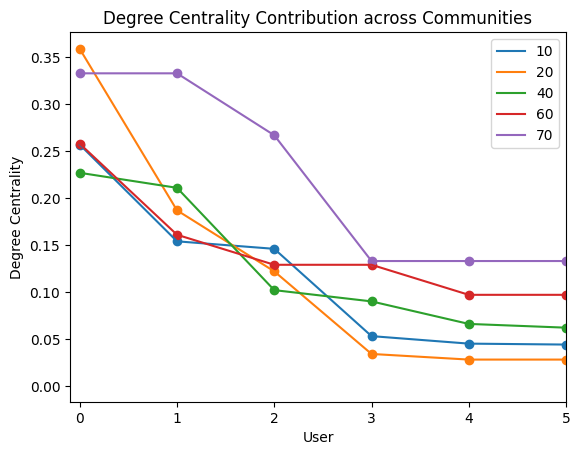

In [ ]:
sizes = [10, 20, 40, 60, 70]
all_x = [];
all_data = [];

for s in sizes:
  y = get_centralities(2015, n=s)
  x = range(len(y))
  all_x.append(x)
  all_data.append(y)

for j in range(len(all_data)):
  print('Size of Community', str(sizes[j] + 1), ': ', len(all_data[j]))

for i in range(len(all_data)):
    # plt.figure()
    plt.scatter(all_x[i], all_data[i])
    plt.plot(all_x[i], all_data[i], label=str(sizes[i]))

plt.xlim(-0.1, 5)
plt.ylabel('Degree Centrality')
plt.xlabel('User')
plt.title('Degree Centrality Contribution across Communities')
plt.legend()
plt.show()

Size of Community 61 :  37
Size of Community 63 :  18
Size of Community 65 :  20
Size of Community 67 :  18
Size of Community 69 :  17


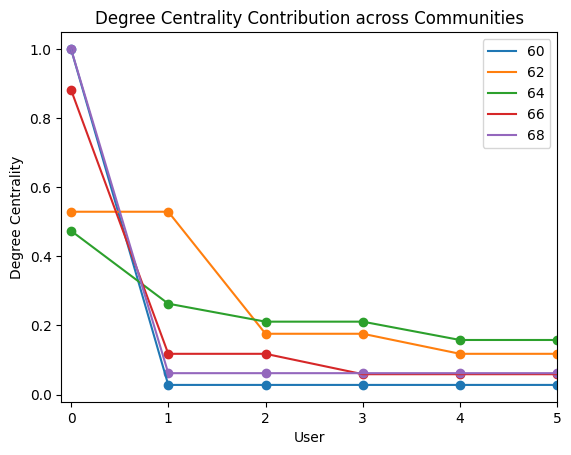

In [ ]:
sizes = range(60, 70, 2)
all_x = [];
all_data = [];

for s in sizes:
  y = get_centralities(2019, n=s)
  x = range(len(y))
  all_x.append(x)
  all_data.append(y)

for j in range(len(all_data)):
  print('Size of Community', str(sizes[j] + 1), ': ', len(all_data[j]))

for i in range(len(all_data)):
    # plt.figure()
    plt.scatter(all_x[i], all_data[i])
    plt.plot(all_x[i], all_data[i], label=str(sizes[i]))

plt.xlim(-0.1, 5)
plt.ylabel('Degree Centrality')
plt.xlabel('User')
plt.title('Degree Centrality Contribution across Communities')
plt.legend()
plt.show()

2019:

Size of Community 11 :  2934
Size of Community 21 :  1328
Size of Community 41 :  325
Size of Community 61 :  41
Size of Community 71 :  23


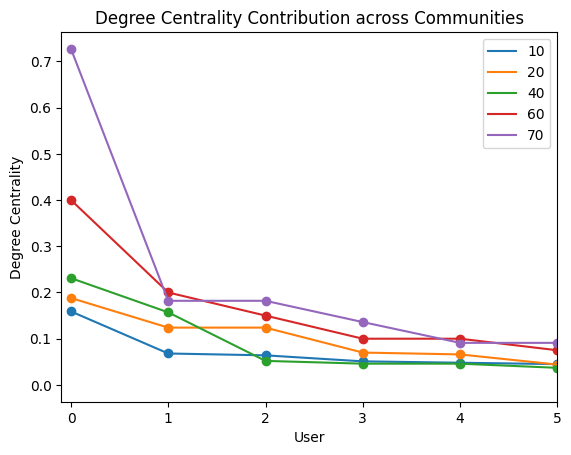

In [ ]:
sizes = [10, 20, 40, 60, 70]
all_x = [];
all_data = [];

for s in sizes:
  y = get_centralities(2019, n=s)
  x = range(len(y))
  all_x.append(x)
  all_data.append(y)

for j in range(len(all_data)):
  print('Size of Community', str(sizes[j] + 1), ': ', len(all_data[j]))

for i in range(len(all_data)):
    # plt.figure()
    plt.scatter(all_x[i], all_data[i])
    plt.plot(all_x[i], all_data[i], label=str(sizes[i]))

plt.xlim(-0.1, 5)
plt.ylabel('Degree Centrality')
plt.xlabel('User')
plt.title('Degree Centrality Contribution across Communities')
plt.legend()
plt.show()

Size of Community 71 :  20
Size of Community 73 :  19
Size of Community 75 :  16
Size of Community 77 :  17
Size of Community 79 :  14


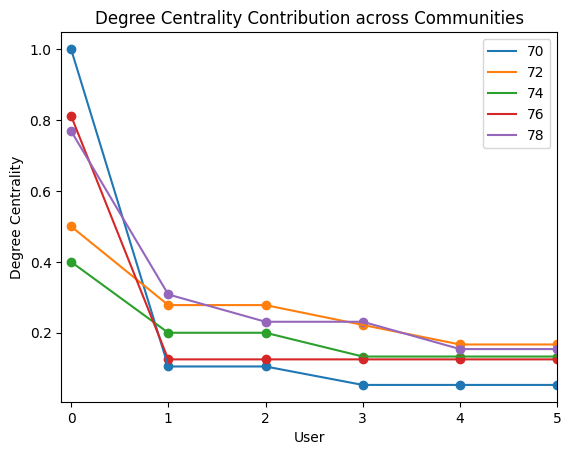

In [ ]:
sizes = range(70, 80, 2)
all_x = [];
all_data = [];

for s in sizes:
  y = get_centralities(2019, n=s)
  x = range(len(y))
  all_x.append(x)
  all_data.append(y)

for j in range(len(all_data)):
  print('Size of Community', str(sizes[j] + 1), ': ', len(all_data[j]))

for i in range(len(all_data)):
    # plt.figure()
    plt.scatter(all_x[i], all_data[i])
    plt.plot(all_x[i], all_data[i], label=str(sizes[i]))

plt.xlim(-0.1, 5)
plt.ylabel('Degree Centrality')
plt.xlabel('User')
plt.title('Degree Centrality Contribution across Communities')
plt.legend()
plt.show()

### Drawing these communities, searching for "star-like" graphs (large centrality)

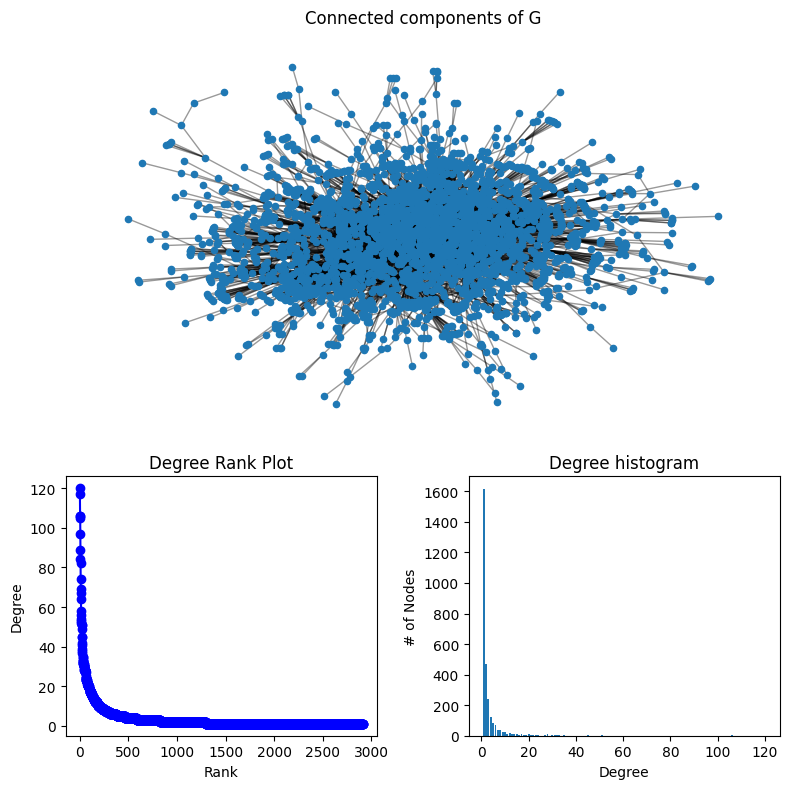

Average Shortest Path Length:  4.575


In [ ]:
com_deg_info(2015, 0)

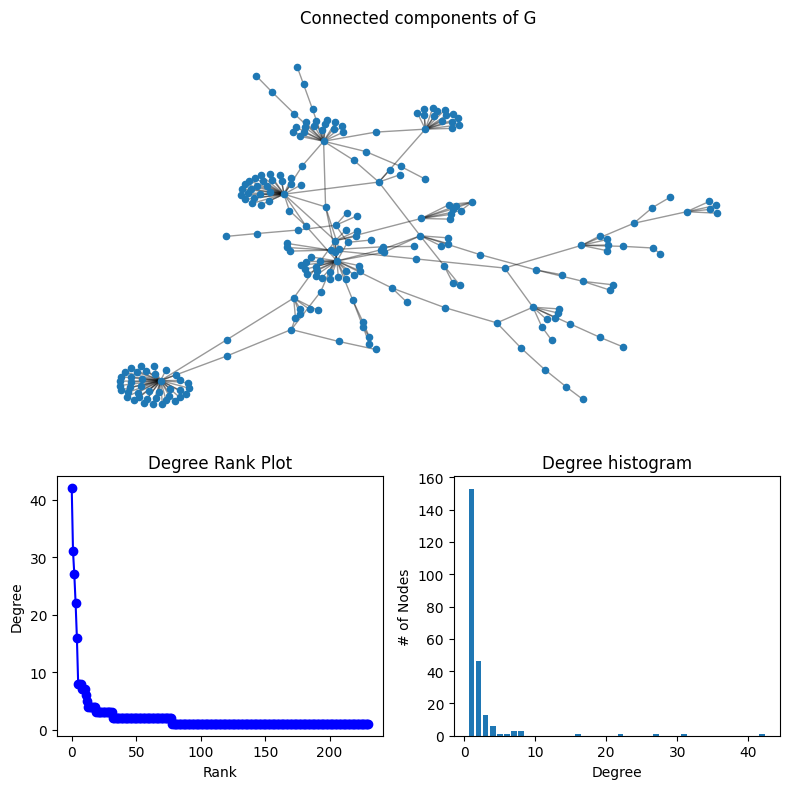

Average Shortest Path Length:  6.437


In [ ]:
com_deg_info(2015, 40)

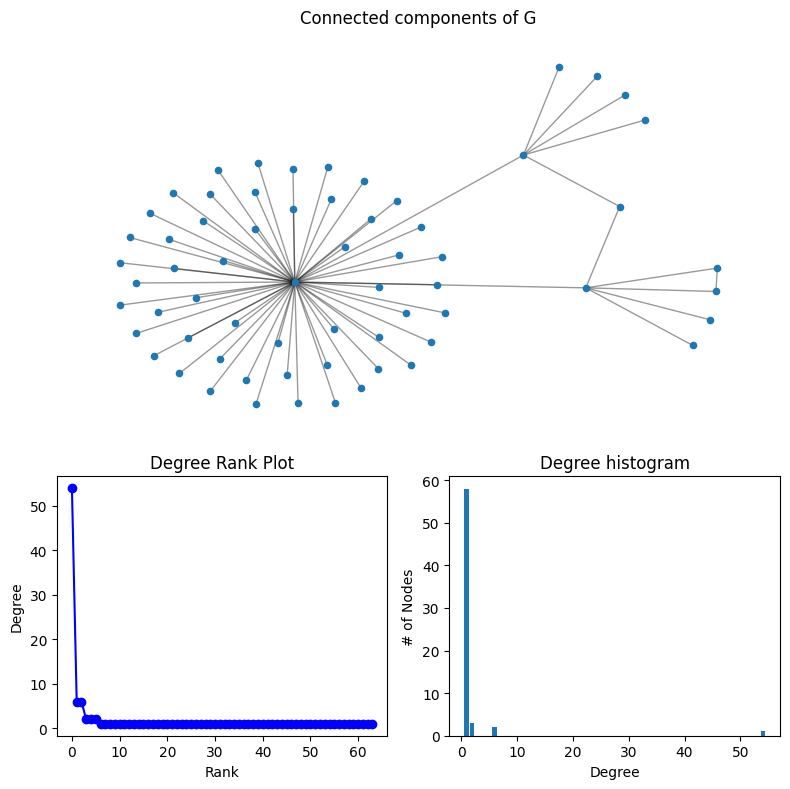

Average Shortest Path Length:  2.22


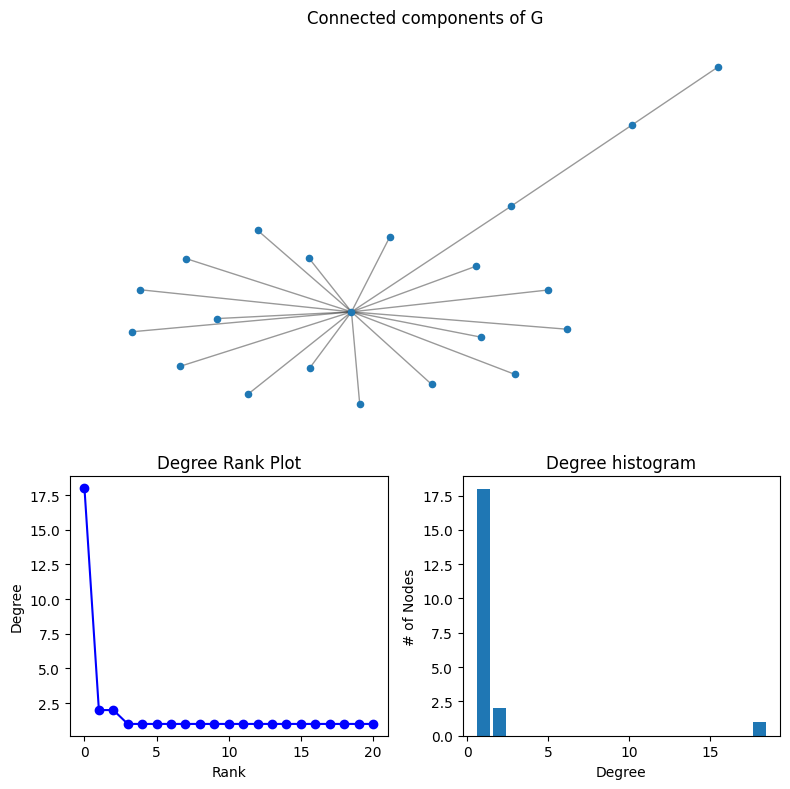

Average Shortest Path Length:  2.152


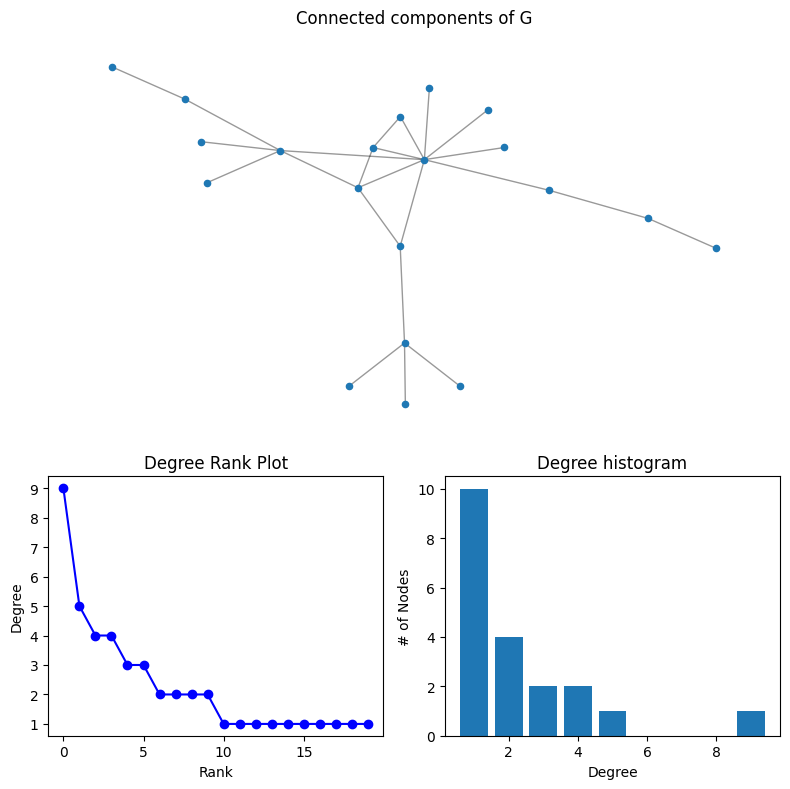

Average Shortest Path Length:  3.011


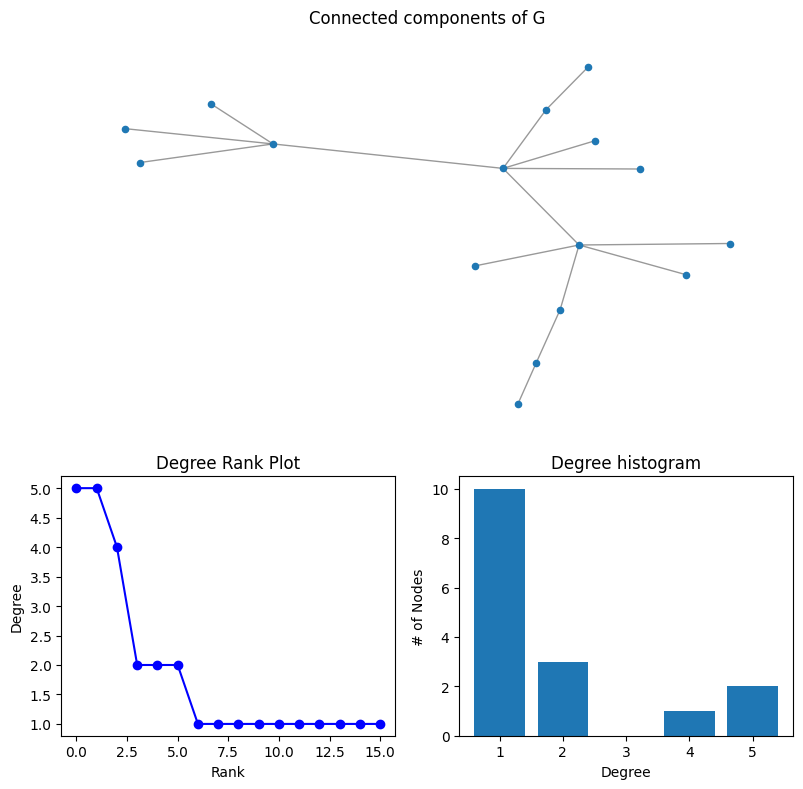

Average Shortest Path Length:  2.967


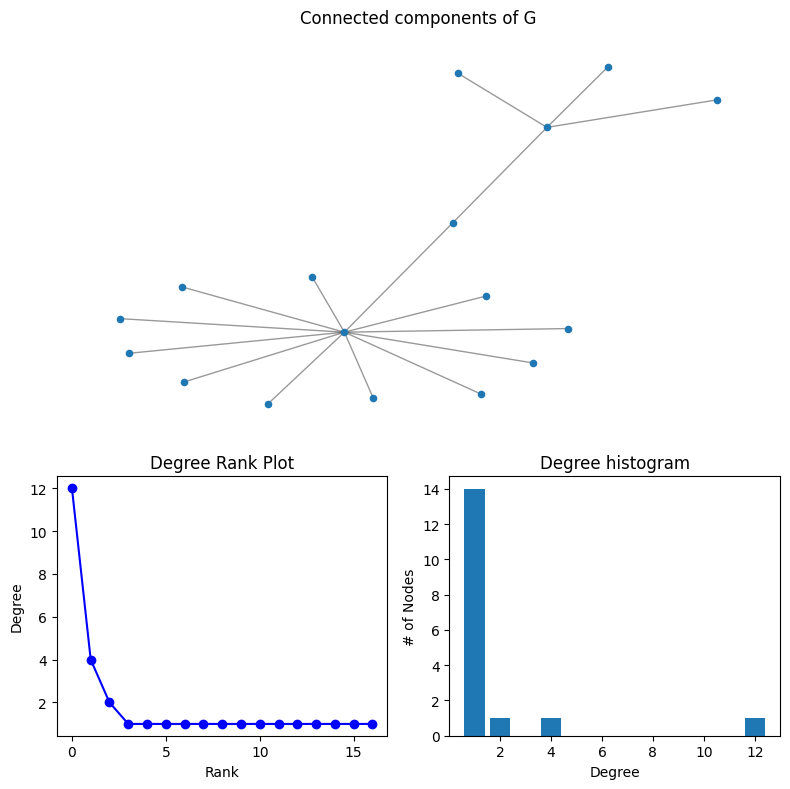

Average Shortest Path Length:  2.471


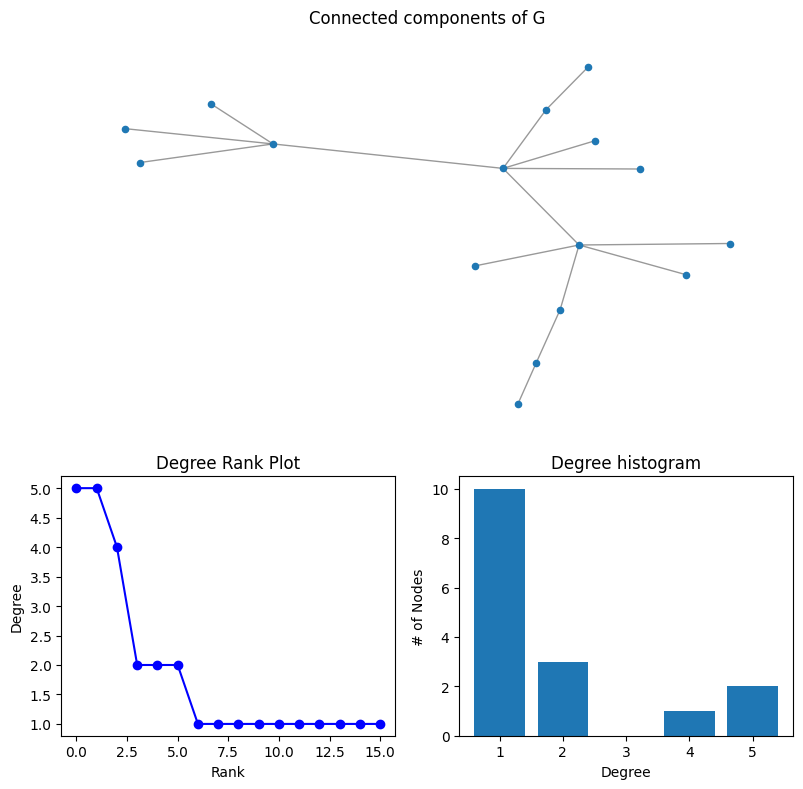

Average Shortest Path Length:  2.967


In [ ]:
sizes = range(60, 72, 2)
for s in sizes:
  com_deg_info(2015, s)

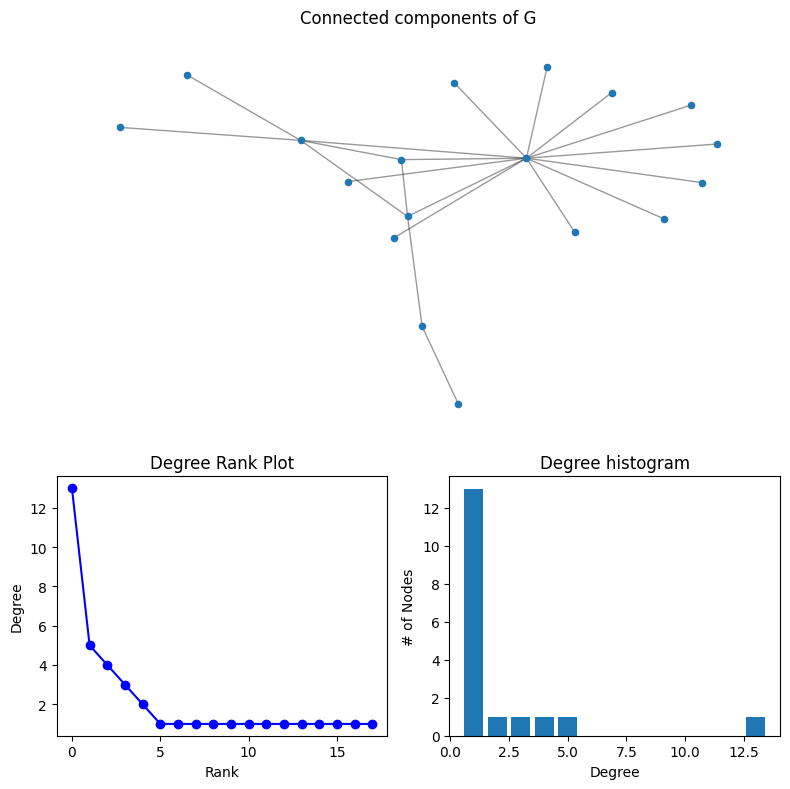

Average Shortest Path Length:  2.255


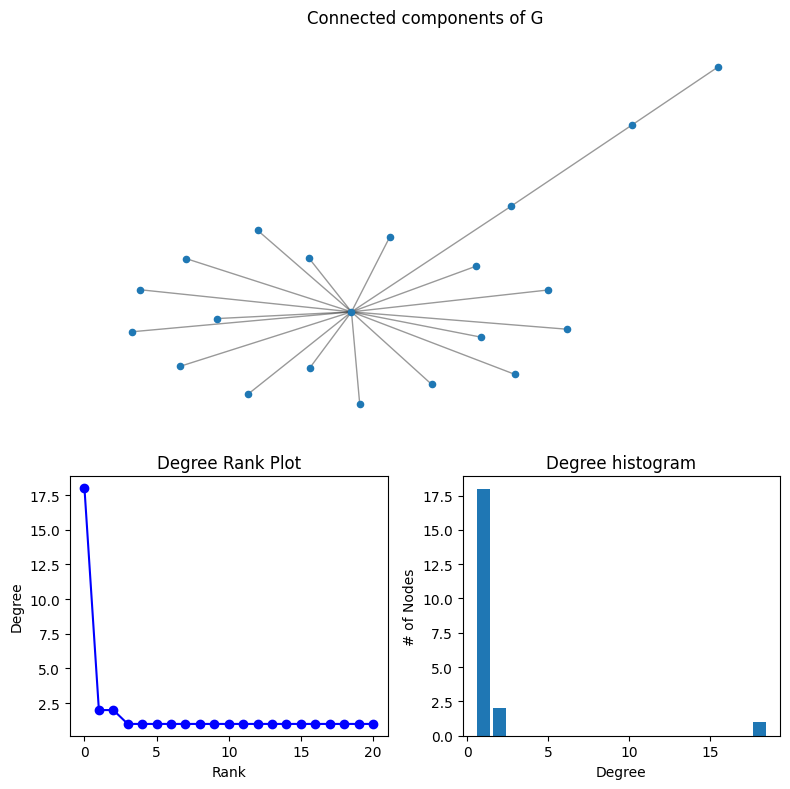

Average Shortest Path Length:  2.152


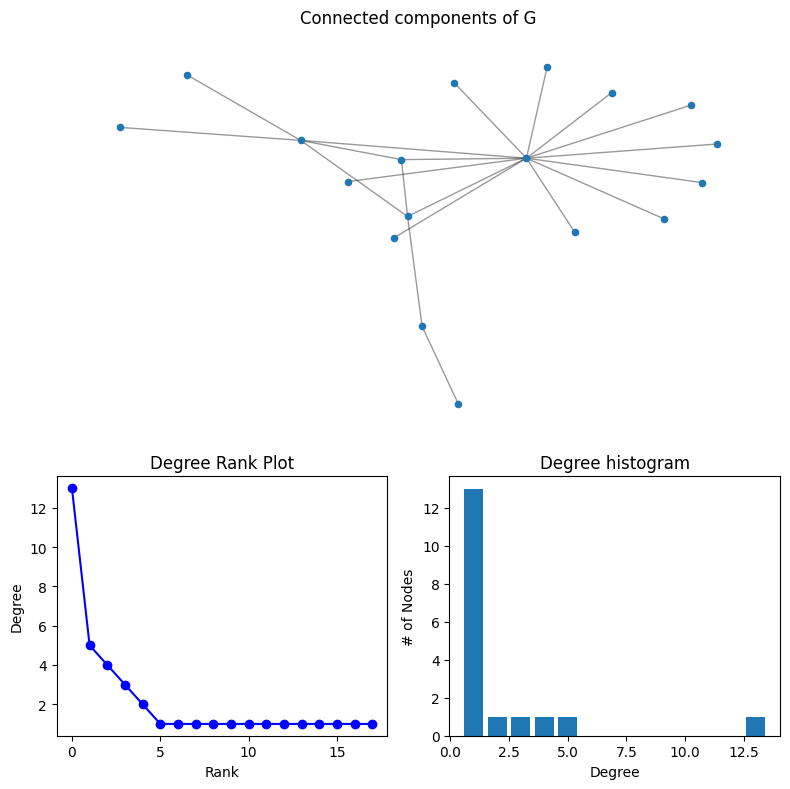

Average Shortest Path Length:  2.255


In [ ]:
sizes = range(66, 69)
for s in sizes:
  com_deg_info(2015, s)

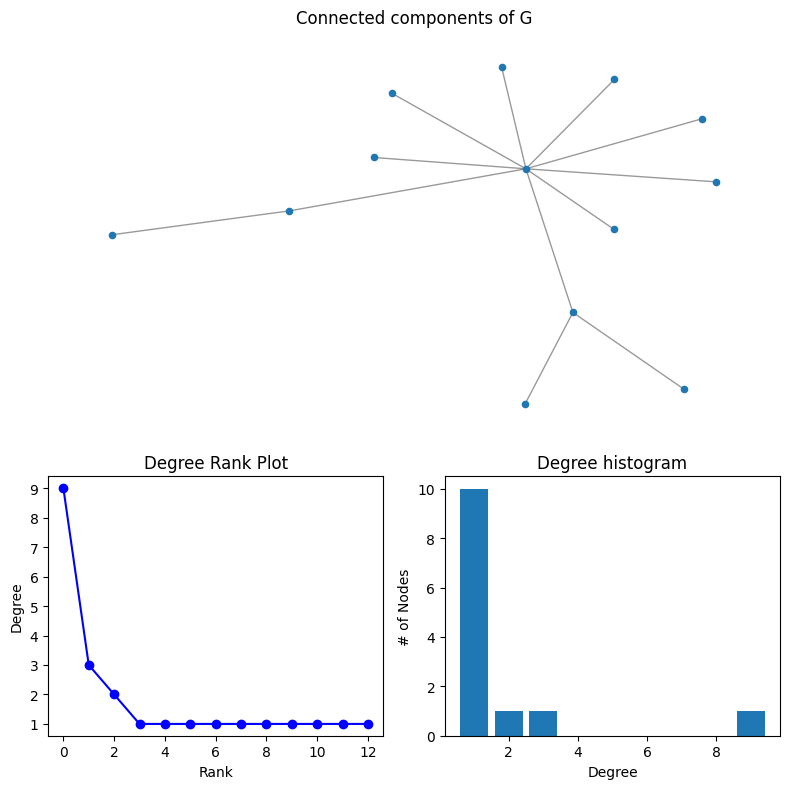

Average Shortest Path Length:  2.205


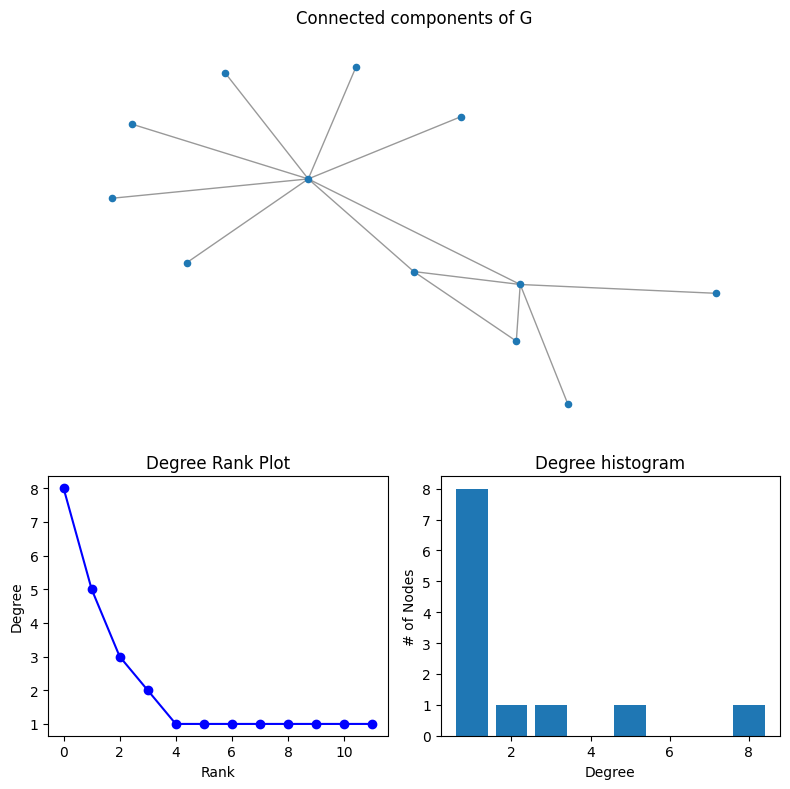

Average Shortest Path Length:  2.076


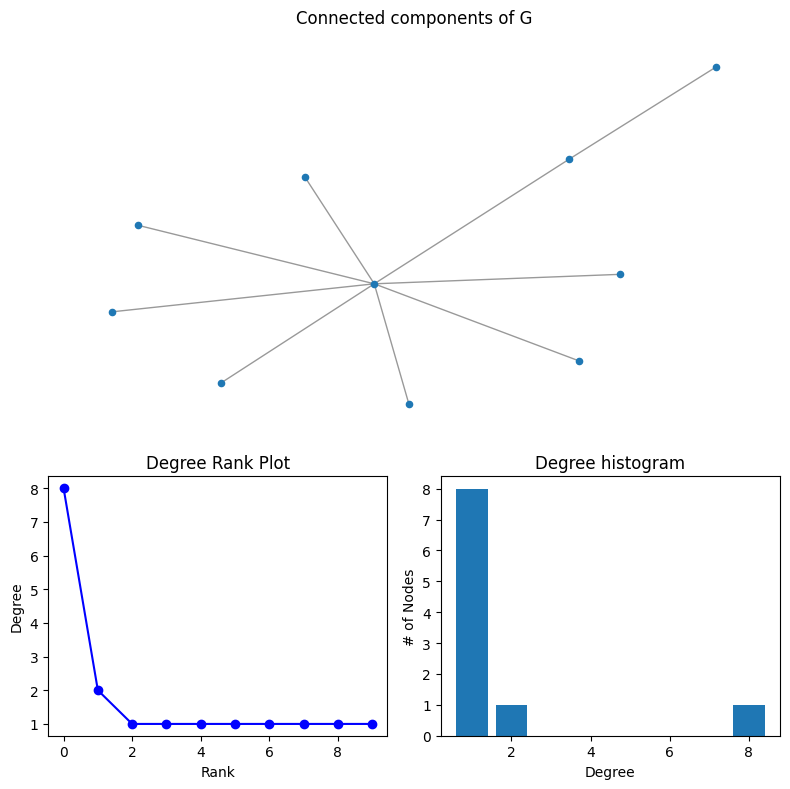

Average Shortest Path Length:  1.956


In [ ]:
sizes = range(80, 110, 10)
for s in sizes:
  com_deg_info(2015, s)

2019:

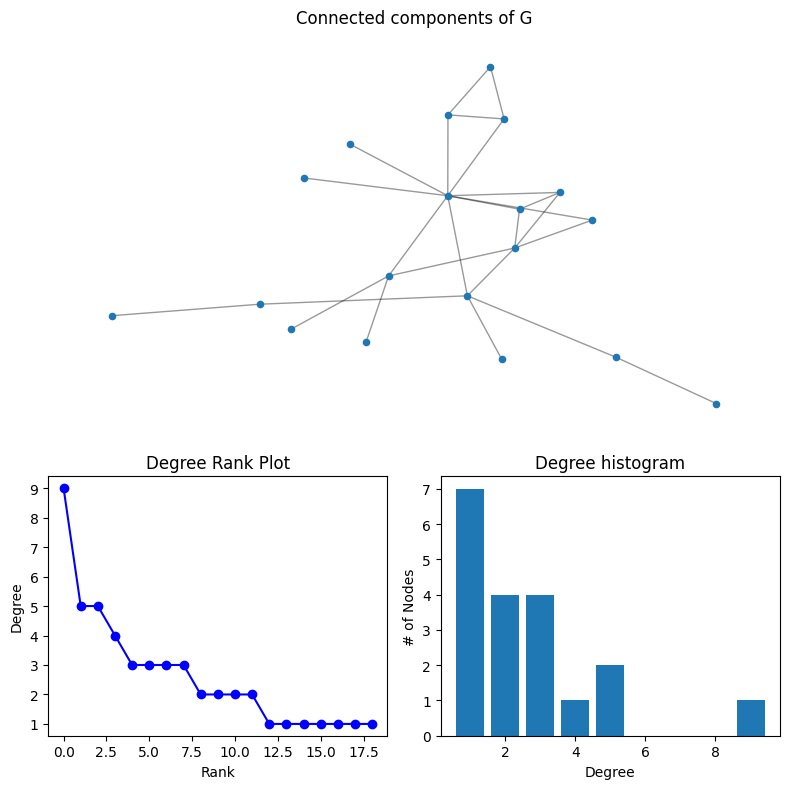

Average Shortest Path Length:  2.643


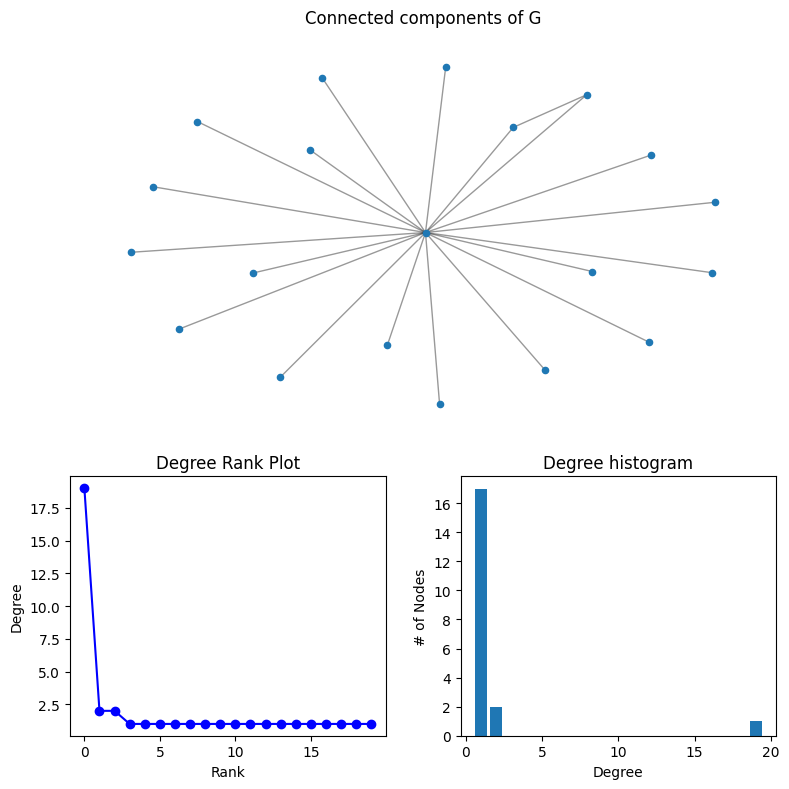

Average Shortest Path Length:  1.895


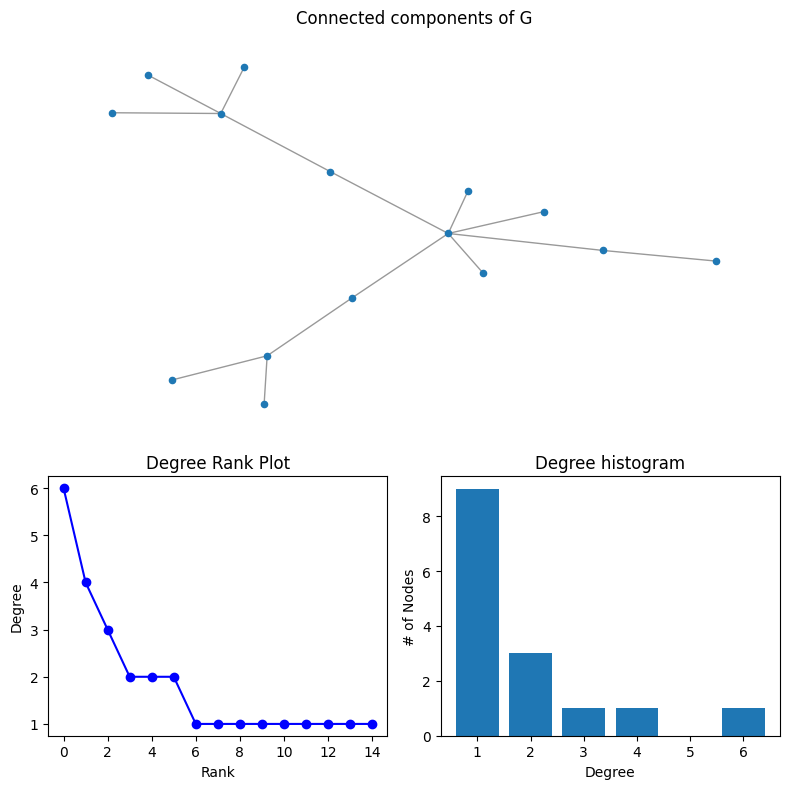

Average Shortest Path Length:  3.105


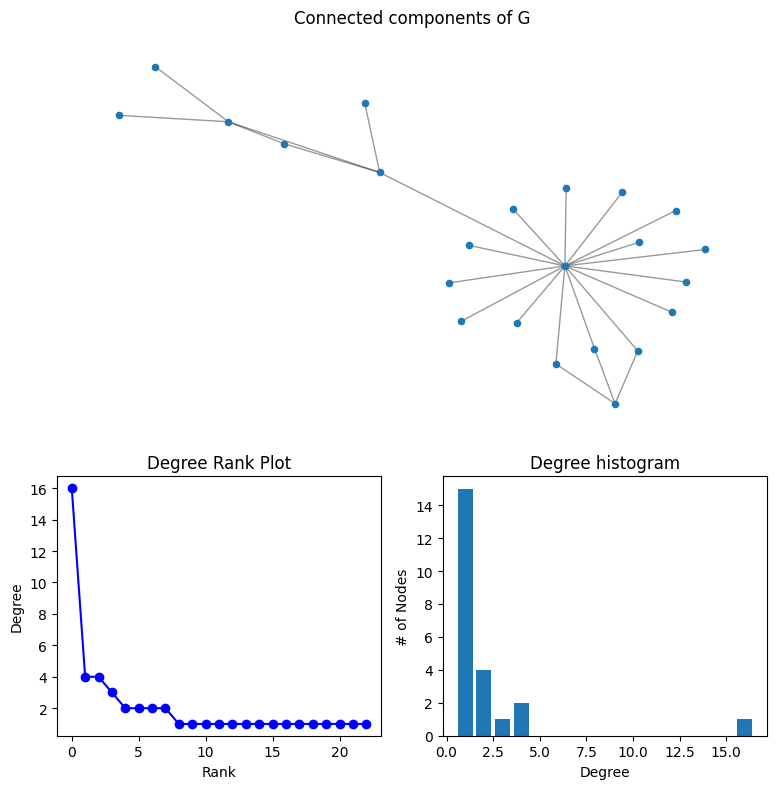

Average Shortest Path Length:  2.431


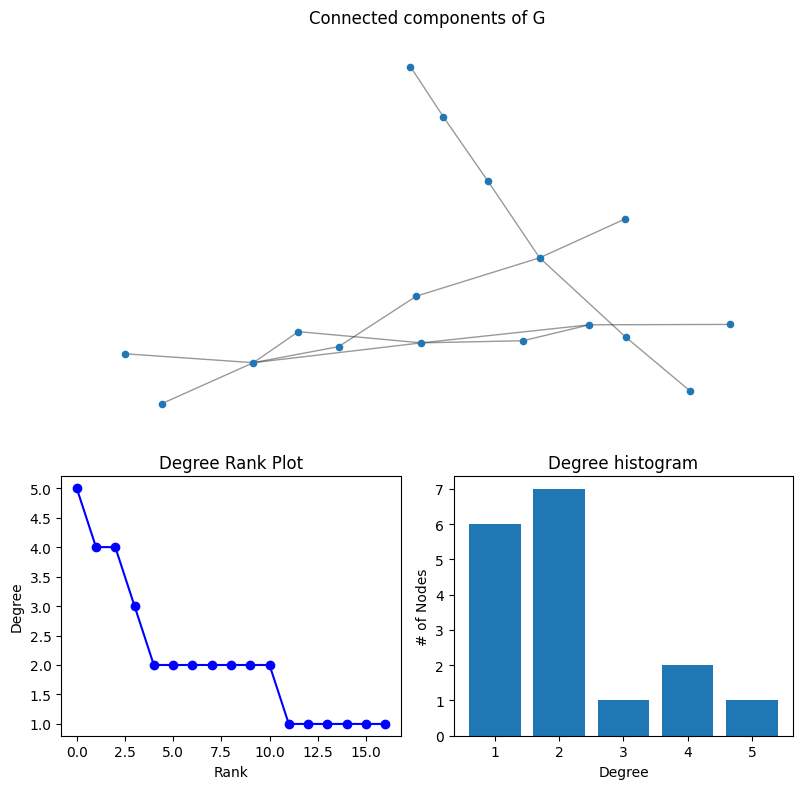

Average Shortest Path Length:  3.824


In [ ]:
sizes = range(70, 80, 2)
for s in sizes:
  com_deg_info(2019, s)

Plotting Individual Sentiments, Marking Influencer Sentiments

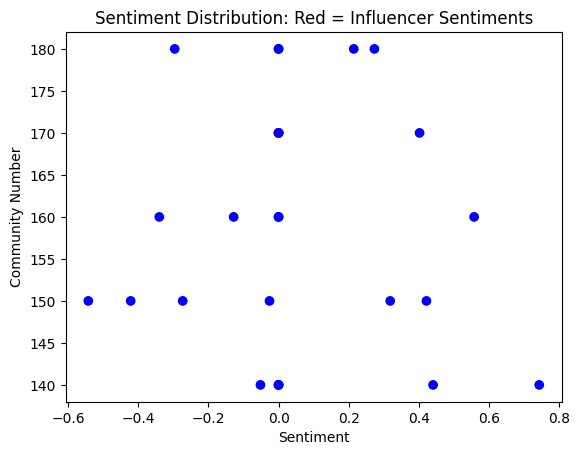

In [ ]:
df = df_year(mention_df, 2015)
sizes = range(140, 190, 10)

for s in sizes:
  comdf = get_com_df(2015, s)
  infl_list = get_com_influencer(comdf)

  # comdf[comdf['username'].isin(infl_list)]
  comdf2 = comdf
  comdf2['color'] = comdf.username.apply(lambda x: "r" if x == infl_list[0] else "b")

  plt.scatter(y=s*np.ones(len(comdf2)), x= comdf2["sentiment"], c = comdf2["color"])

plt.ylabel('Community Number')
plt.xlabel('Sentiment')
plt.title('Sentiment Distribution: Red = Influencer Sentiments')
plt.show()

### Comparing Influencer Sentiment with Peon Sentiments

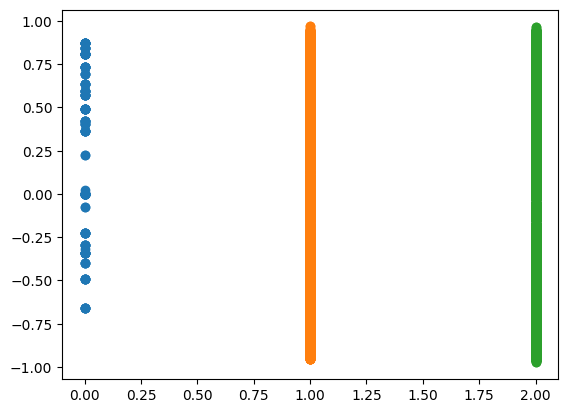

In [ ]:
infl_spread(2019, 0)

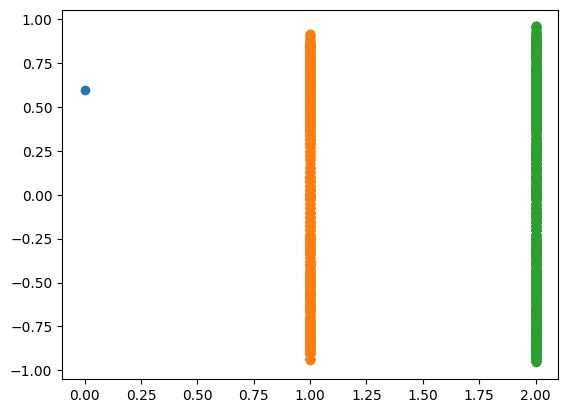

In [ ]:
infl_spread(2019, 2)

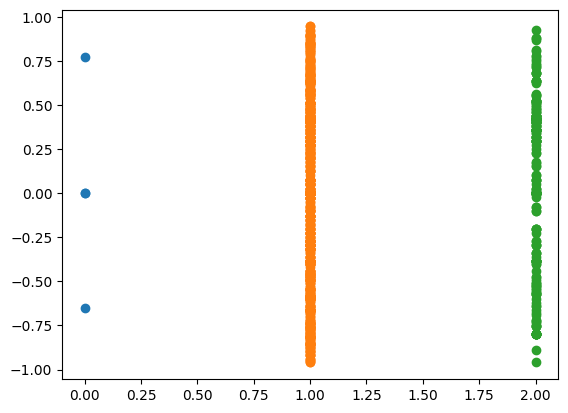

In [ ]:
infl_spread(2019, 10)

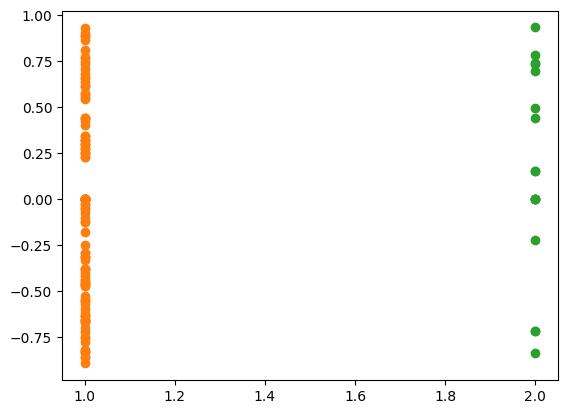

In [ ]:
infl_spread(2019, 50)

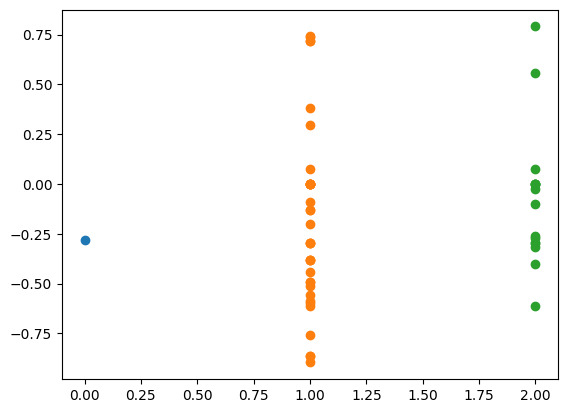

In [ ]:
infl_spread(2019, 60)

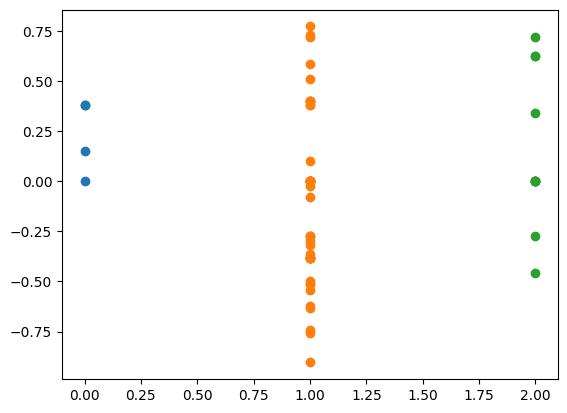

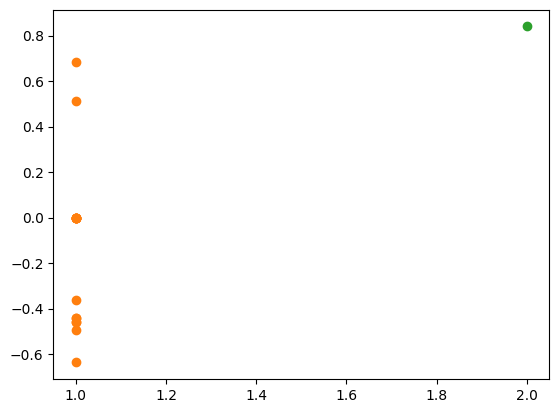

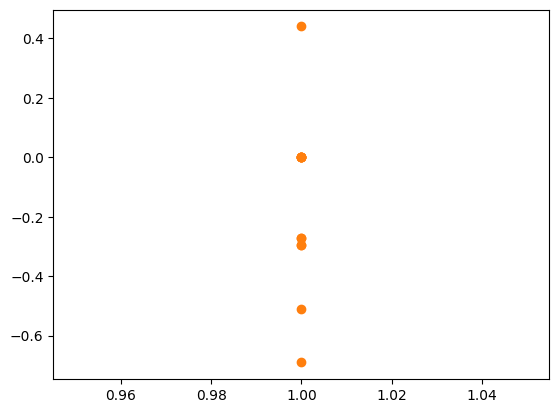

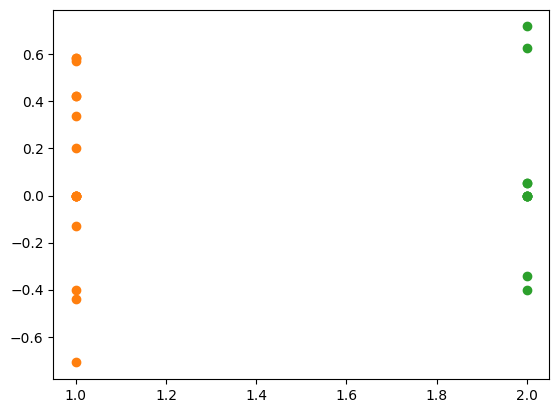

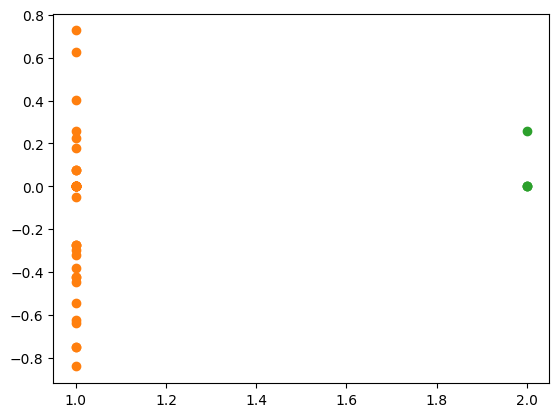

In [ ]:
sizes = range(60, 65)
for s in sizes:
  infl_spread(2015, 60)

# Echo Chambers

Preliminary Functions

In [ ]:
import metis
from scipy.stats import norm

def two_com_plots(df):
  # first, generate the graph
  G = nx.from_pandas_edgelist(df, 'username', 'interact_with')

  # use METIS to generate graph partition
  (edgecuts, parts) = metis.part_graph(G, nparts = 2)

  # label nodes with corresponding part labels
  node_list = list(G.nodes())
  com1 = [];
  com2 = [];
  for p in range(len(parts)):
    if parts[p] == 0:
      com1.append(node_list[p])
    else:
      com2.append(node_list[p])

  # now, plot
  fig, axes = plt.subplots(1, 2, figsize=(10, 3))

  ############# COMMUNITY 1
  com1df = df[df['username'].isin(com1)]
  com1df = com1df[com1df['interact_with'].isin(com1)]
  com1sents = com1df.groupby(['username'])['sentiment'].mean().tolist()
  # data to fit normal distribution
  mu, std = norm.fit(com1sents)
  # Plot the PDF.
  xmin, xmax = min(com1sents), max(com1sents)  # Set x-axis limits based on data range
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, mu, std)

  axes[0].hist(com1sents, bins=25, density=True, alpha=0.6, color='b')
  axes[0].plot(x, p, 'k', linewidth=2)
  title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
  axes[0].set_title(title)

  ############# COMMUNITY 2
  com2df = df[df['username'].isin(com2)]
  com2df = com2df[com2df['interact_with'].isin(com2)]
  com2sents = com2df.groupby(['username'])['sentiment'].mean().tolist()
  # data to fit normal distribution
  mu, std = norm.fit(com2sents)
  # Plot the PDF.
  xmin, xmax = min(com2sents), max(com2sents)  # Set x-axis limits based on data range
  x = np.linspace(xmin, xmax, 100)
  p = norm.pdf(x, mu, std)

  axes[1].hist(com2sents, bins=25, density=True, alpha=0.6, color='b')
  axes[1].plot(x, p, 'k', linewidth=2)
  title = "Fit Values: {:.2f} and {:.2f}".format(mu, std)
  axes[1].set_title(title)

  plt.tight_layout()  # Ensures proper spacing between subplots
  plt.show()

Using METIS to partition into 2 communities: Echo Chambers?

In [ ]:
import metis

df = df_year(mention_df, 2015)
G = nx.from_pandas_edgelist(df, 'username', 'interact_with')
# nx.draw(G, with_labels=True)
(edgecuts, parts) = metis.part_graph(G, nparts = 2)

# label nodes with corresponding part labels
node_list = list(G.nodes())
com1 = [];
com2 = [];
for p in range(len(parts)):
  if parts[p] == 0:
    com1.append(node_list[p])
  else:
    com2.append(node_list[p])

from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

############# COMMUNITY 1
com1df = df[df['username'].isin(com1)]
com1df = com1df[com1df['interact_with'].isin(com1)]

############# COMMUNITY 2
com2df = df[df['username'].isin(com2)]
com2df = com2df[com2df['interact_with'].isin(com2)]

print(quick_mod(com1df))
print(quick_mod(com2df))

0.79
0.94


In [ ]:
import metis

df = df_year(mention_df, 2016)
G = nx.from_pandas_edgelist(df, 'username', 'interact_with')
# nx.draw(G, with_labels=True)
(edgecuts, parts) = metis.part_graph(G, nparts = 2)

# label nodes with corresponding part labels
node_list = list(G.nodes())
com1 = [];
com2 = [];
for p in range(len(parts)):
  if parts[p] == 0:
    com1.append(node_list[p])
  else:
    com2.append(node_list[p])

from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

############# COMMUNITY 1
com1df = df[df['username'].isin(com1)]
com1df = com1df[com1df['interact_with'].isin(com1)]

############# COMMUNITY 2
com2df = df[df['username'].isin(com2)]
com2df = com2df[com2df['interact_with'].isin(com2)]

print(quick_mod(com1df))
print(quick_mod(com2df))

0.81
0.95


In [ ]:
import metis

df = df_year(mention_df, 2017)
G = nx.from_pandas_edgelist(df, 'username', 'interact_with')
# nx.draw(G, with_labels=True)
(edgecuts, parts) = metis.part_graph(G, nparts = 2)

# label nodes with corresponding part labels
node_list = list(G.nodes())
com1 = [];
com2 = [];
for p in range(len(parts)):
  if parts[p] == 0:
    com1.append(node_list[p])
  else:
    com2.append(node_list[p])

from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

############# COMMUNITY 1
com1df = df[df['username'].isin(com1)]
com1df = com1df[com1df['interact_with'].isin(com1)]

############# COMMUNITY 2
com2df = df[df['username'].isin(com2)]
com2df = com2df[com2df['interact_with'].isin(com2)]

print(quick_mod(com1df))
print(quick_mod(com2df))

0.86
0.69


In [ ]:
import metis

df = df_year(mention_df, 2018)
G = nx.from_pandas_edgelist(df, 'username', 'interact_with')
# nx.draw(G, with_labels=True)
(edgecuts, parts) = metis.part_graph(G, nparts = 2)

# label nodes with corresponding part labels
node_list = list(G.nodes())
com1 = [];
com2 = [];
for p in range(len(parts)):
  if parts[p] == 0:
    com1.append(node_list[p])
  else:
    com2.append(node_list[p])

from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

############# COMMUNITY 1
com1df = df[df['username'].isin(com1)]
com1df = com1df[com1df['interact_with'].isin(com1)]

############# COMMUNITY 2
com2df = df[df['username'].isin(com2)]
com2df = com2df[com2df['interact_with'].isin(com2)]

print(quick_mod(com1df))
print(quick_mod(com2df))

0.85
0.69


In [ ]:
import metis

df = df_year(mention_df, 2019)
G = nx.from_pandas_edgelist(df, 'username', 'interact_with')
# nx.draw(G, with_labels=True)
(edgecuts, parts) = metis.part_graph(G, nparts = 2)

# label nodes with corresponding part labels
node_list = list(G.nodes())
com1 = [];
com2 = [];
for p in range(len(parts)):
  if parts[p] == 0:
    com1.append(node_list[p])
  else:
    com2.append(node_list[p])

from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np

############# COMMUNITY 1
com1df = df[df['username'].isin(com1)]
com1df = com1df[com1df['interact_with'].isin(com1)]

############# COMMUNITY 2
com2df = df[df['username'].isin(com2)]
com2df = com2df[com2df['interact_with'].isin(com2)]

print(quick_mod(com1df))
print(quick_mod(com2df))

0.61
0.87


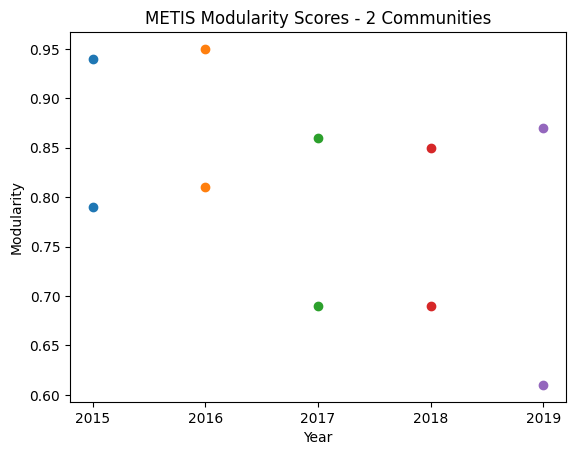

In [ ]:
data_15 = (0.79, 0.94)
data_16 = (0.81, 0.95)
data_17 = (0.86, 0.69)
data_18 = (0.85, 0.69)
data_19 = (0.61, 0.87)
all_data = (0.79, 0.94, 0.81, 0.95, 0.86, 0.69, 0.85, 0.69, 0.61, 0.87)

years = range(2015, 2020)
labels=['2015', '2016', '2017', '2018', '2019']

for yr in years:
  i = yr - 2014
  plt.scatter(x = np.array([2*[yr]]).flatten(), y = all_data[2*(i-1):2*i])

plt.xlabel('Year')
plt.ylabel('Modularity')
plt.title('METIS Modularity Scores - 2 Communities')
plt.xticks(years, labels)
plt.show()

### Other Years

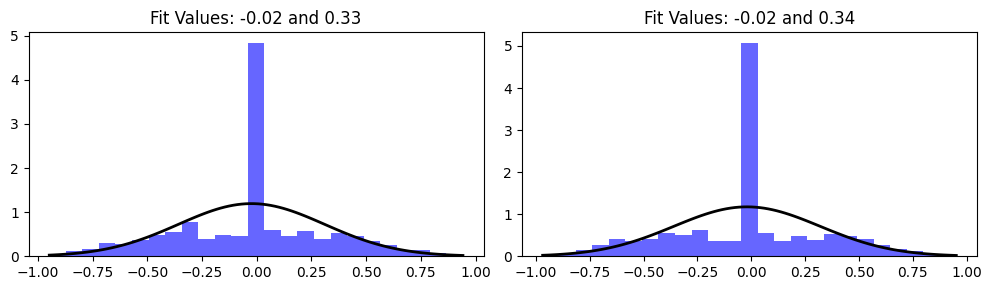

In [ ]:
df = df_year(mention_df, 2015)
two_com_plots(df)

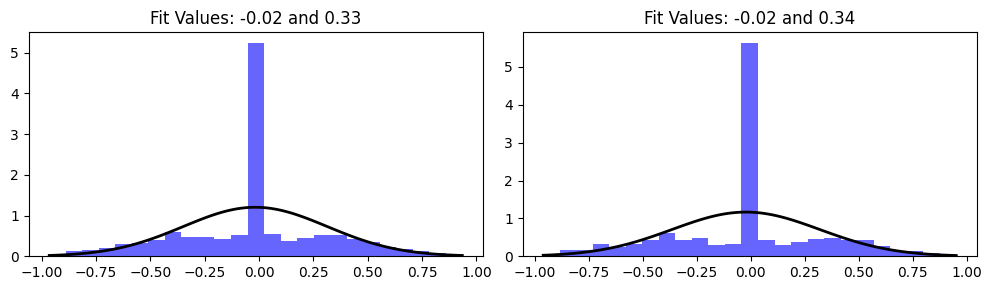

In [ ]:
df = df_year(mention_df, 2016)
two_com_plots(df)

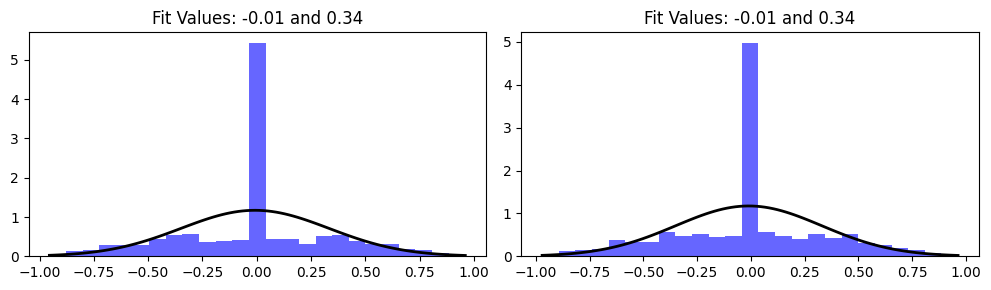

In [ ]:
df = df_year(mention_df, 2017)
two_com_plots(df)

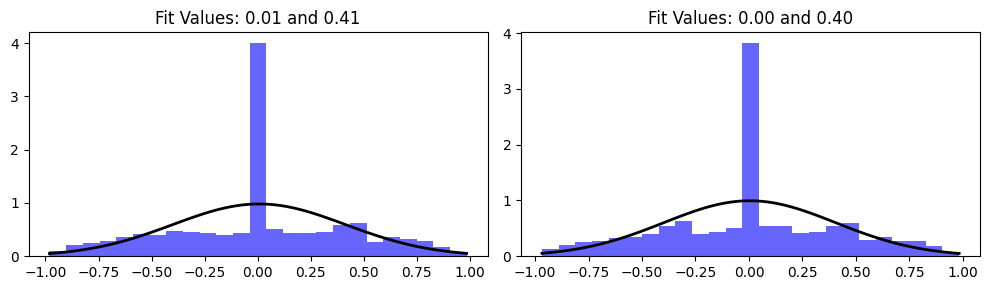

In [ ]:
df = df_year(mention_df, 2018)
two_com_plots(df)

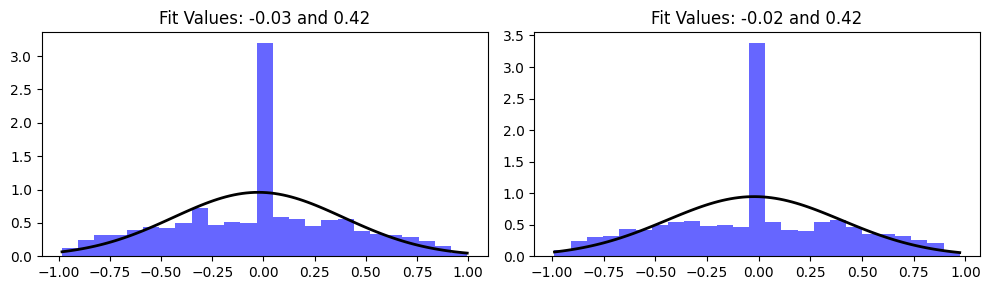

In [ ]:
df = df_year(mention_df, 2019)
two_com_plots(df)